## Imports das bibliotecas

In [1]:
!pip install -q gdown

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [3]:
import json
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Visualização das Colunas
pd.set_option('display.max_columns', None)

## Leitura dos dataframes

In [5]:
# https://drive.google.com/file/d/1AigMb7Sz6ucnvvqVNKBj0P8CZP8pb_lc/view?usp=sharing
gdown.download(f"https://drive.google.com/uc?id=1AigMb7Sz6ucnvvqVNKBj0P8CZP8pb_lc", "/content/subamostra_traduzida_com_acertos.parquet", quiet=False)
df_traduzido_acertos = pd.read_parquet("/content/subamostra_traduzida_com_acertos.parquet")

Downloading...
From: https://drive.google.com/uc?id=1AigMb7Sz6ucnvvqVNKBj0P8CZP8pb_lc
To: /content/subamostra_traduzida_com_acertos.parquet
100%|██████████| 29.3M/29.3M [00:00<00:00, 62.9MB/s]


In [6]:
df_traduzido = df_traduzido_acertos.copy()

In [7]:
df_traduzido

,NU_INSCRICAO,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,acertos_lc,acertos_ch,acertos_cn,acertos_mt
0,190001004651,2019,0,18,Solteiro(a),Parda,1,2,0,Pública,1.0,0,1505502.0,PA,2.0,1.0,1.0,1,1,1,1,505.0,508.0,512.0,518.0,412.5,417.2,485.1,446.2,ACABBECAEDDBEECBADDADCEDACBEECEDBEEBDBDDDDADD,ABACCDDECDCBCDAABBDADABCBCAEEBCCBACBCDACCADAB,99999CBBEBCDDBDBECEDEEBCBBDDBBEAEBAACDAEEBECDE...,DDBCBBDCBDECCAACEDAAEBABABCEBDACEBCBACCEADDDB,Espanhol,1.0,140.0,120.0,120.0,80.0,120.0,580.0,5.0,5.0,2.0,2.0,3.0,1.25,1.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,11.0,11.0,10.0,6.0
1,190001004662,2019,1,17,Solteiro(a),Parda,1,3,0,Não Respondeu,NaN,1,NaN,None,NaN,NaN,NaN,1,1,1,1,503.0,510.0,513.0,515.0,511.9,492.8,478.5,432.8,EDECACDDEDBEADEADBCAEBADAACEDCAEEDEBDCBADBBCA,AEECBBDDBABADBCAEBDBAAECCCBCCDCDCBCDAAEBCBDBE,99999DABBEBBBDBACADEBDDDEDEAEADDCCBABEAABCCECB...,BEDBADCCBECDBDDBACACABBAABDEBADD*EDBDCECBDCAB,Espanhol,1.0,120.0,160.0,120.0,120.0,80.0,600.0,4.0,4.0,6.0,6.0,6.0,0.50,1.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,15.0,13.0,14.0,8.0
2,190001004736,2019,0,18,Solteiro(a),Parda,2,2,0,Pública,1.0,0,1505536.0,PA,2.0,1.0,1.0,1,1,1,1,506.0,507.0,511.0,517.0,465.0,570.9,574.2,614.0,DBCCAEDEECACCEBBDABEDAADCDBBEECBADABAABBCDEDD,BCECABCACBECADEAEBCBCADCEABEEADBAADAABBDEAADE,BECDE99999CCBAABADEBDAAECADECCECECCCEBDABDADBC...,DBCAEAECEEAADBCBDBAABDEACEAEDADBCEACEADBAECEC,Inglês,1.0,140.0,160.0,160.0,120.0,140.0,720.0,2.0,5.0,3.0,2.0,7.0,1.25,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0,25.0,21.0,13.0,13.0
3,190001004926,2019,0,33,Solteiro(a),Preta,1,1,13,Não Respondeu,1.0,0,NaN,None,NaN,NaN,NaN,1,1,1,1,503.0,508.0,512.0,515.0,404.6,487.1,443.4,388.6,CEDDDEDAEDDEADBAAEAEAEDDCDAEEDDBCBEBECBCABDDC,ACABCBBABCCEDDBBEBBAADABBEBEEACDEEECCBBABEEAE,99999BDCABABDEECEECBCDADBEAABAEECCDABEBDEABBCA...,DCACBEDCABBDAAEEDDAEAEECAECECCBEEECAADEECBADE,Espanhol,1.0,120.0,120.0,120.0,80.0,80.0,520.0,4.0,5.0,1.0,2.0,4.0,1.25,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,9.0,15.0,10.0,3.0
4,190001005145,2019,1,28,Casado(a)/Mora com companheiro(a),Parda,1,1,12,Não Respondeu,NaN,0,NaN,None,NaN,NaN,NaN,1,1,1,1,506.0,507.0,511.0,517.0,555.6,485.6,507.7,472.0,DEABCDCEEBDABCDCEEDAEAAADEABDEBBCDB*EADECACDE,BEBCEBACCBADCADAEECDAAECBEDECACCAEBDAEABABEEB,BDABE99999DCDEDCCEEEEAAEAADEECDAACCEABDDDDEEDA...,ABCABCEDABCDEEBCABCDEBEACDBEDEECDCBBDEEABDCEE,Inglês,1.0,120.0,120.0,120.0,120.0,60.0,540.0,2.0,2.0,3.0,2.0,4.0,3.50,1.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,15.0,12.0,16.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299993,210062061309,2023,1,18,Solteiro(a),Parda,1,2,0,Pública,1.0,0,2100055.0,MA,2.0,1.0,1.0,1,1,1,1,1223.0,1194.0,1203.0,1213.0,493.4,429.5,481.8,594.9,CBECDEDEEDCBCAEAEABEDBDEDACABBCCCEABDDEDBACAA,DBEDACEDAAAAACCAABDBEAEEDAABCECBBBEEEAACBCCDE,ECBBBDADBBBEACEEBABEDEEAECCBEAABCDEDCABCDEDCA,ECEAECAADEDBCCBAEABECDBBBBEEABCADCECEADCCDDAE,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,5.0,3.0,1.0,2.0,5.0,0.50,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.

In [8]:
df_traduzido = df_traduzido.rename(columns={'NU_NOTA_CN': 'TRI CN', 'NU_NOTA_CH': 'TRI CH', 'NU_NOTA_LC': 'TRI LC', 'NU_NOTA_MT': 'TRI MT'})
#

In [9]:
# # Obter o índice da linha onde o valor da coluna 'TRI LC' é mínimo
# indice_minimo = df_traduzido['TRI LC'].idxmin()

# # Obter a linha inteira correspondente a esse índice
# linha_minima = df_traduzido.loc[indice_minimo]
# linha_minima['TRI LC']

## Visualização

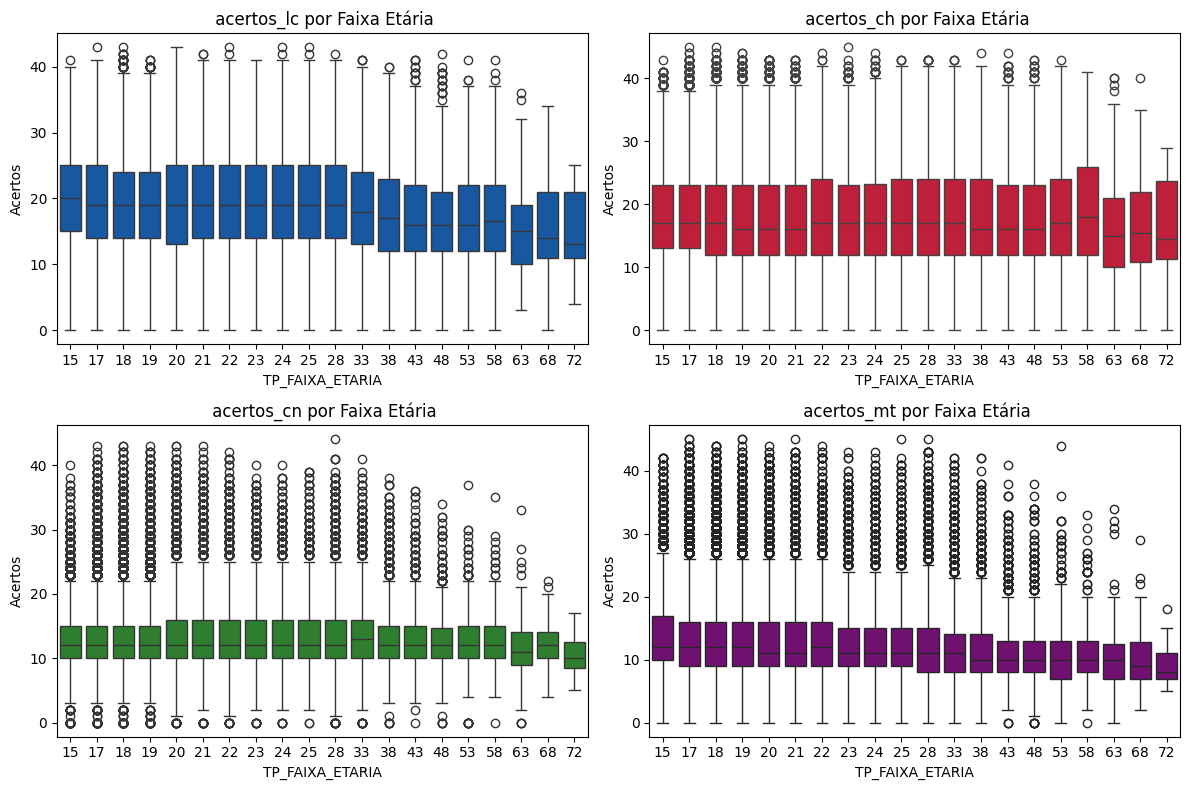

In [10]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_FAIXA_ETARIA', y=coluna, color= cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f' {coluna} por Faixa Etária')
    # plt.xlabel('Faixa Etária (TP_FAIXA_ETARIA)')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

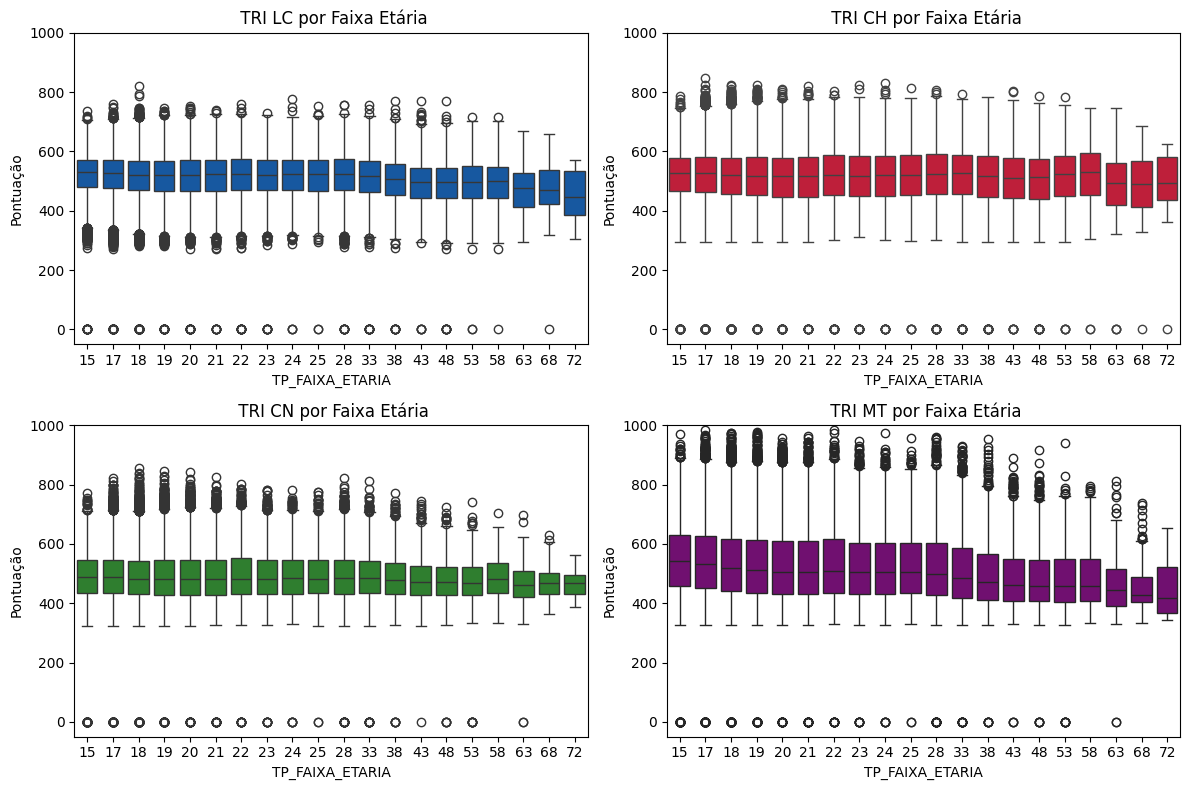

In [11]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_FAIXA_ETARIA', y=coluna, color= cores_materias[coluna])

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(-50, 1000)
    # Adicionando título e rótulos
    plt.title(f' {coluna} por Faixa Etária')
    # plt.xlabel('Faixa Etária (TP_FAIXA_ETARIA)')
    plt.ylabel(f'Pontuação')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

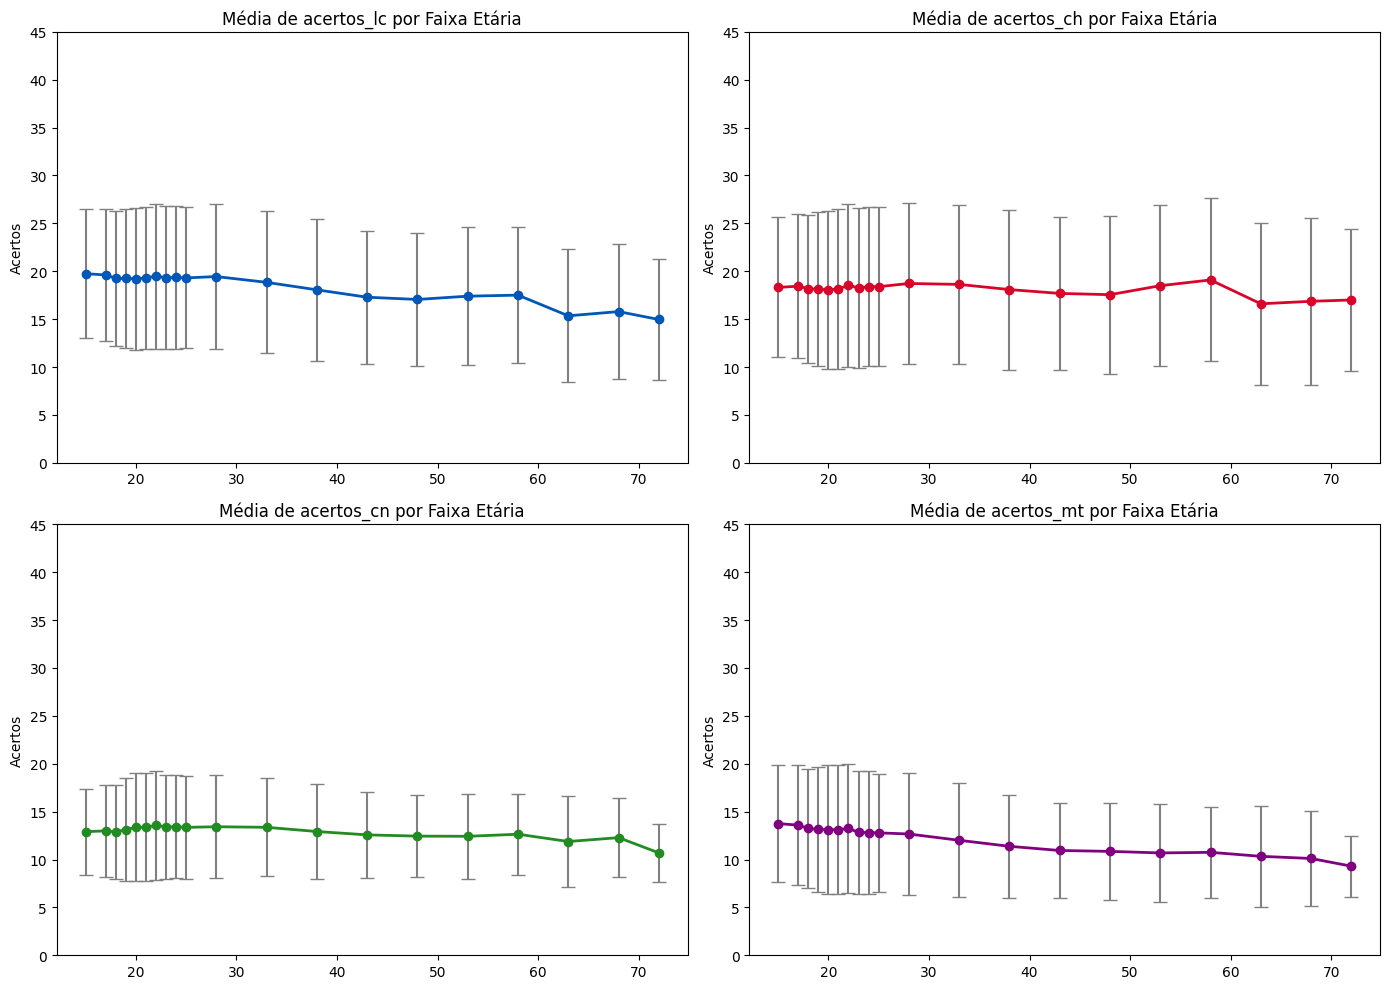

In [12]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_FAIXA_ETARIA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_FAIXA_ETARIA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Faixa Etária')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

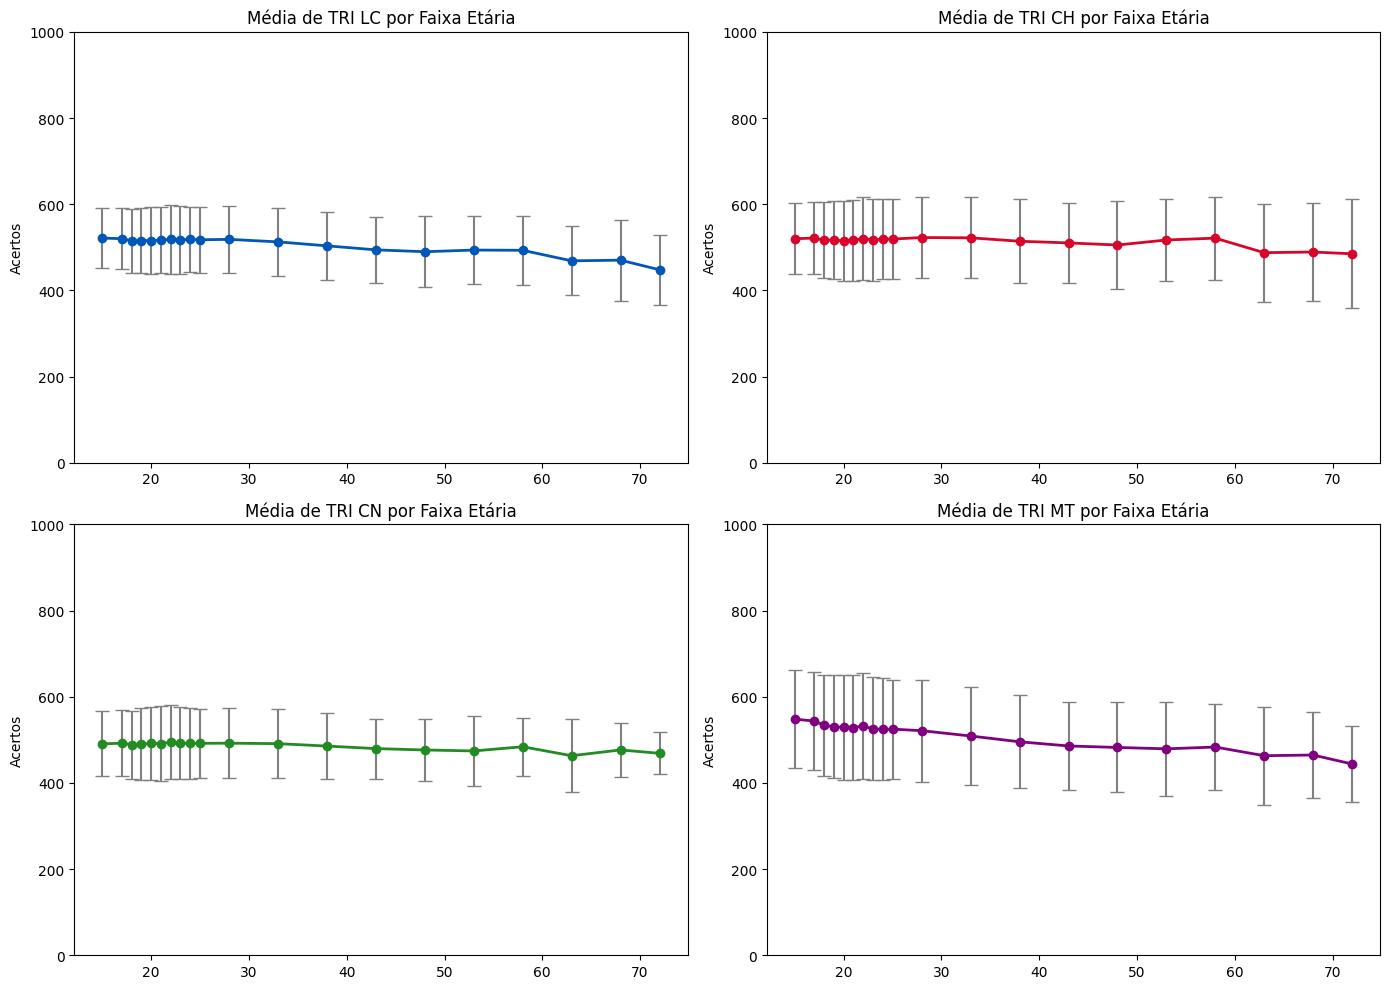

In [13]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_FAIXA_ETARIA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_FAIXA_ETARIA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Faixa Etária')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

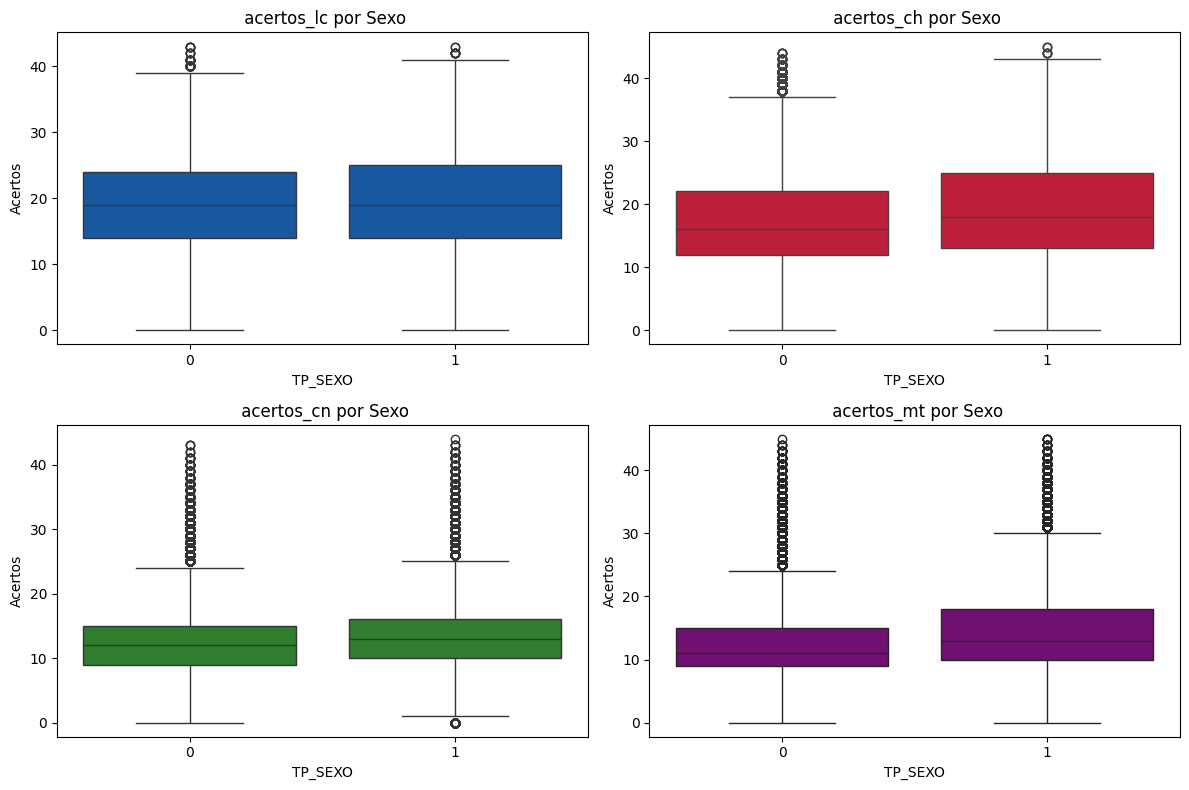

In [14]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_SEXO', y=coluna, color= cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f' {coluna} por Sexo')
    # plt.xlabel('Faixa Etária (TP_FAIXA_ETARIA)')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

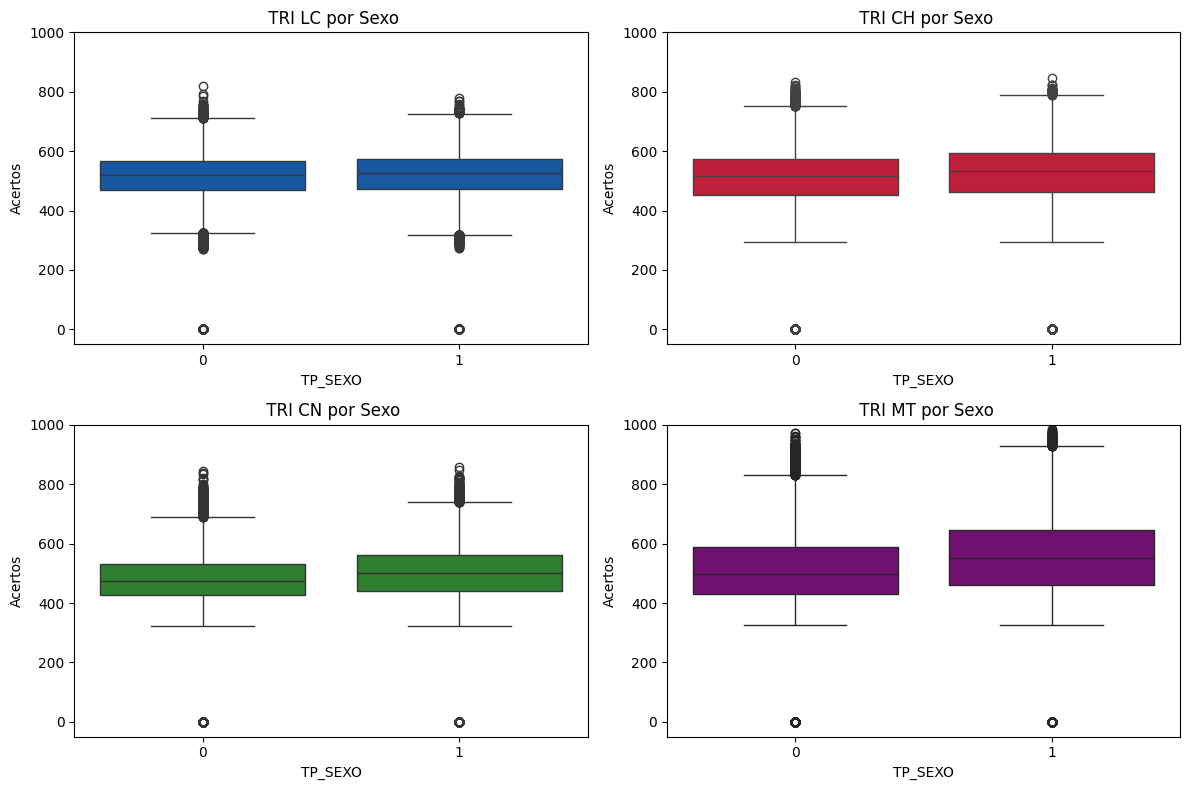

In [15]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(12, 8))


for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_SEXO', y=coluna, color= cores_materias[coluna])

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(-50, 1000)
    # Adicionando título e rótulos
    plt.title(f' {coluna} por Sexo')
    # plt.xlabel('Faixa Etária (TP_FAIXA_ETARIA)')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

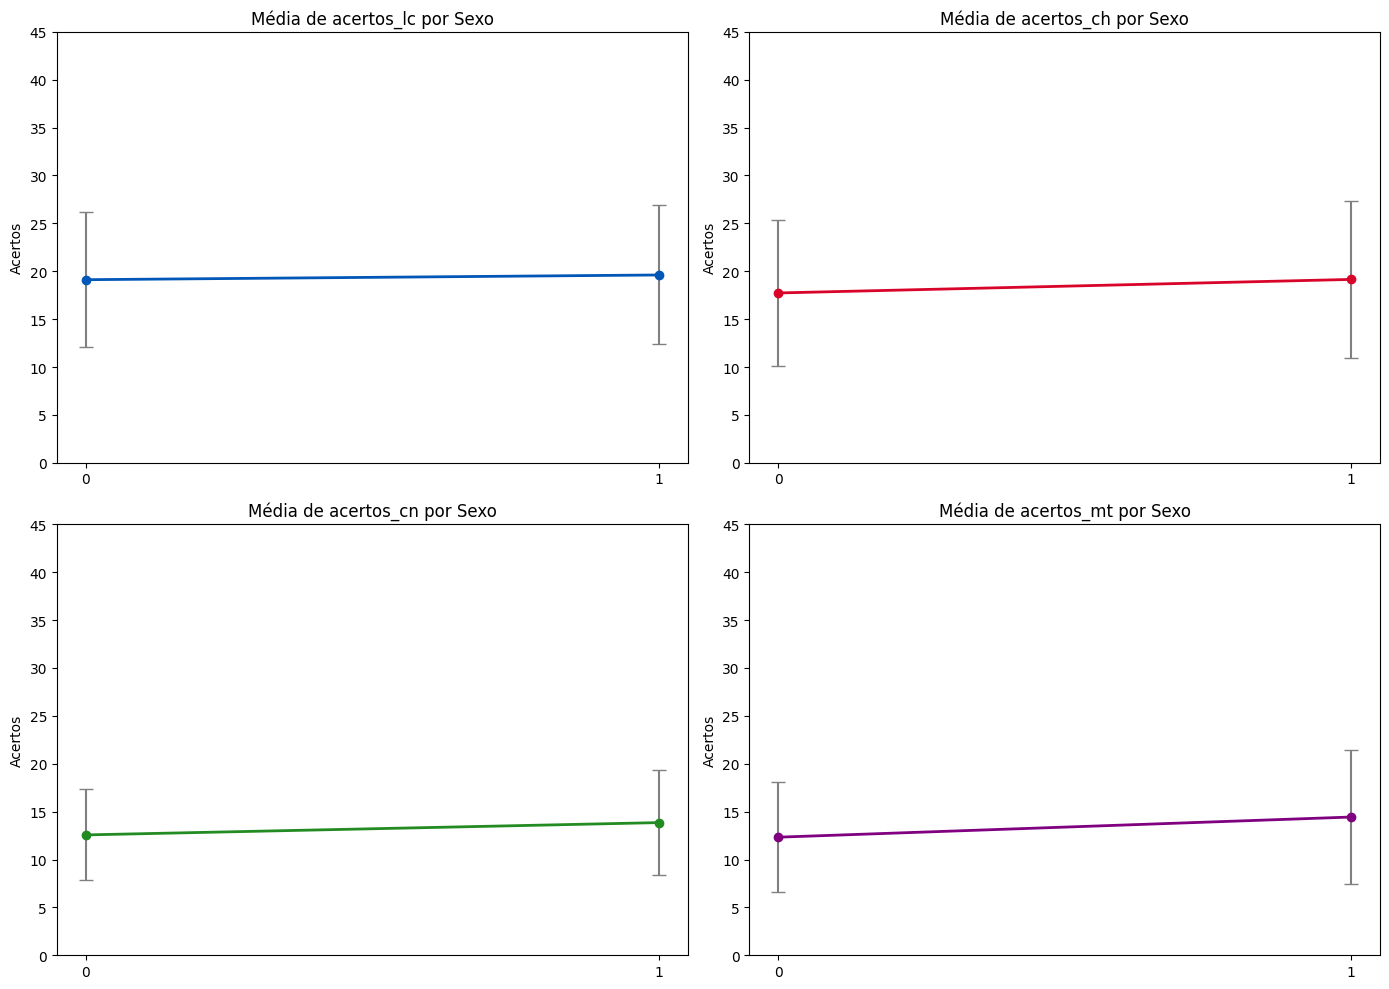

In [16]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_SEXO')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_SEXO')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Sexo')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

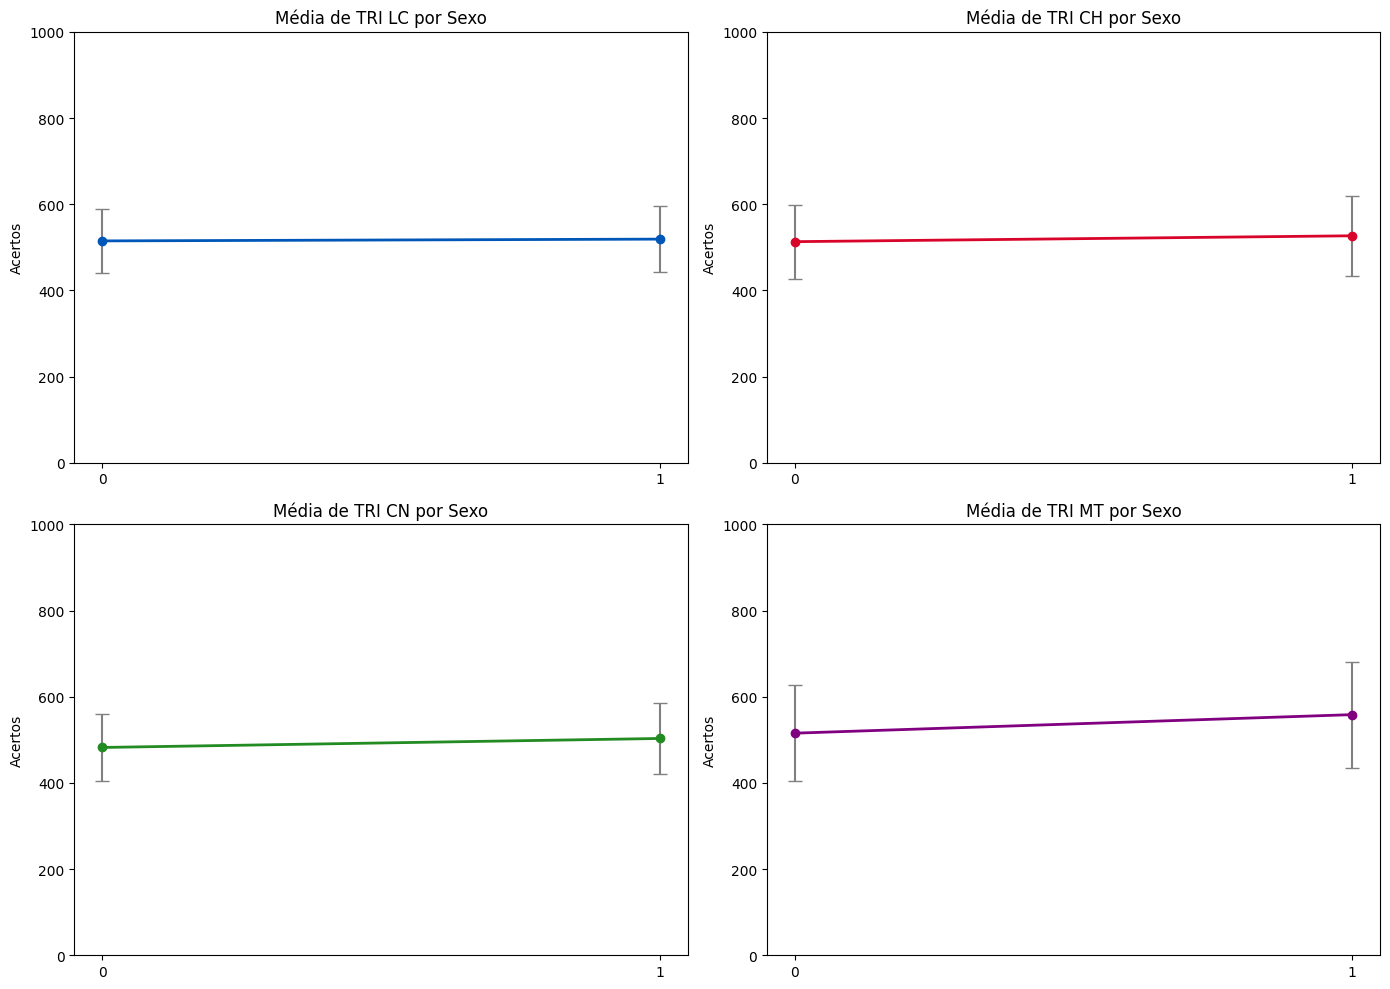

In [17]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_SEXO')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_SEXO')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Sexo')
    plt.ylabel(f'Acertos')

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

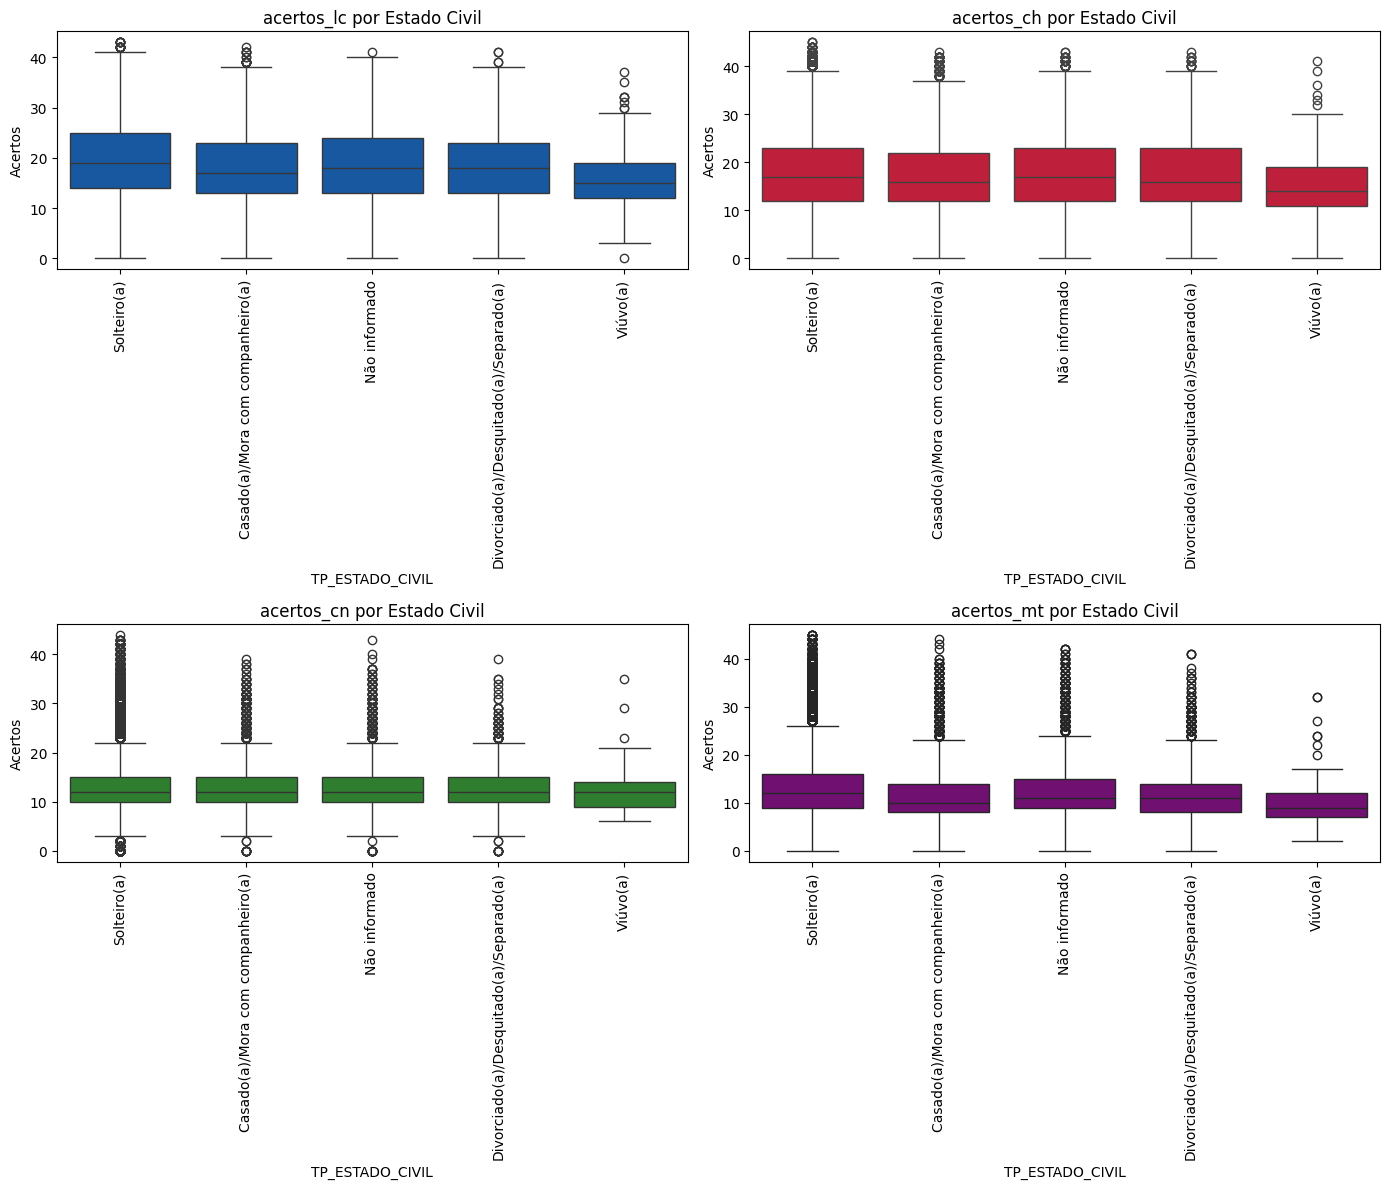

In [18]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_ESTADO_CIVIL', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Estado Civil')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

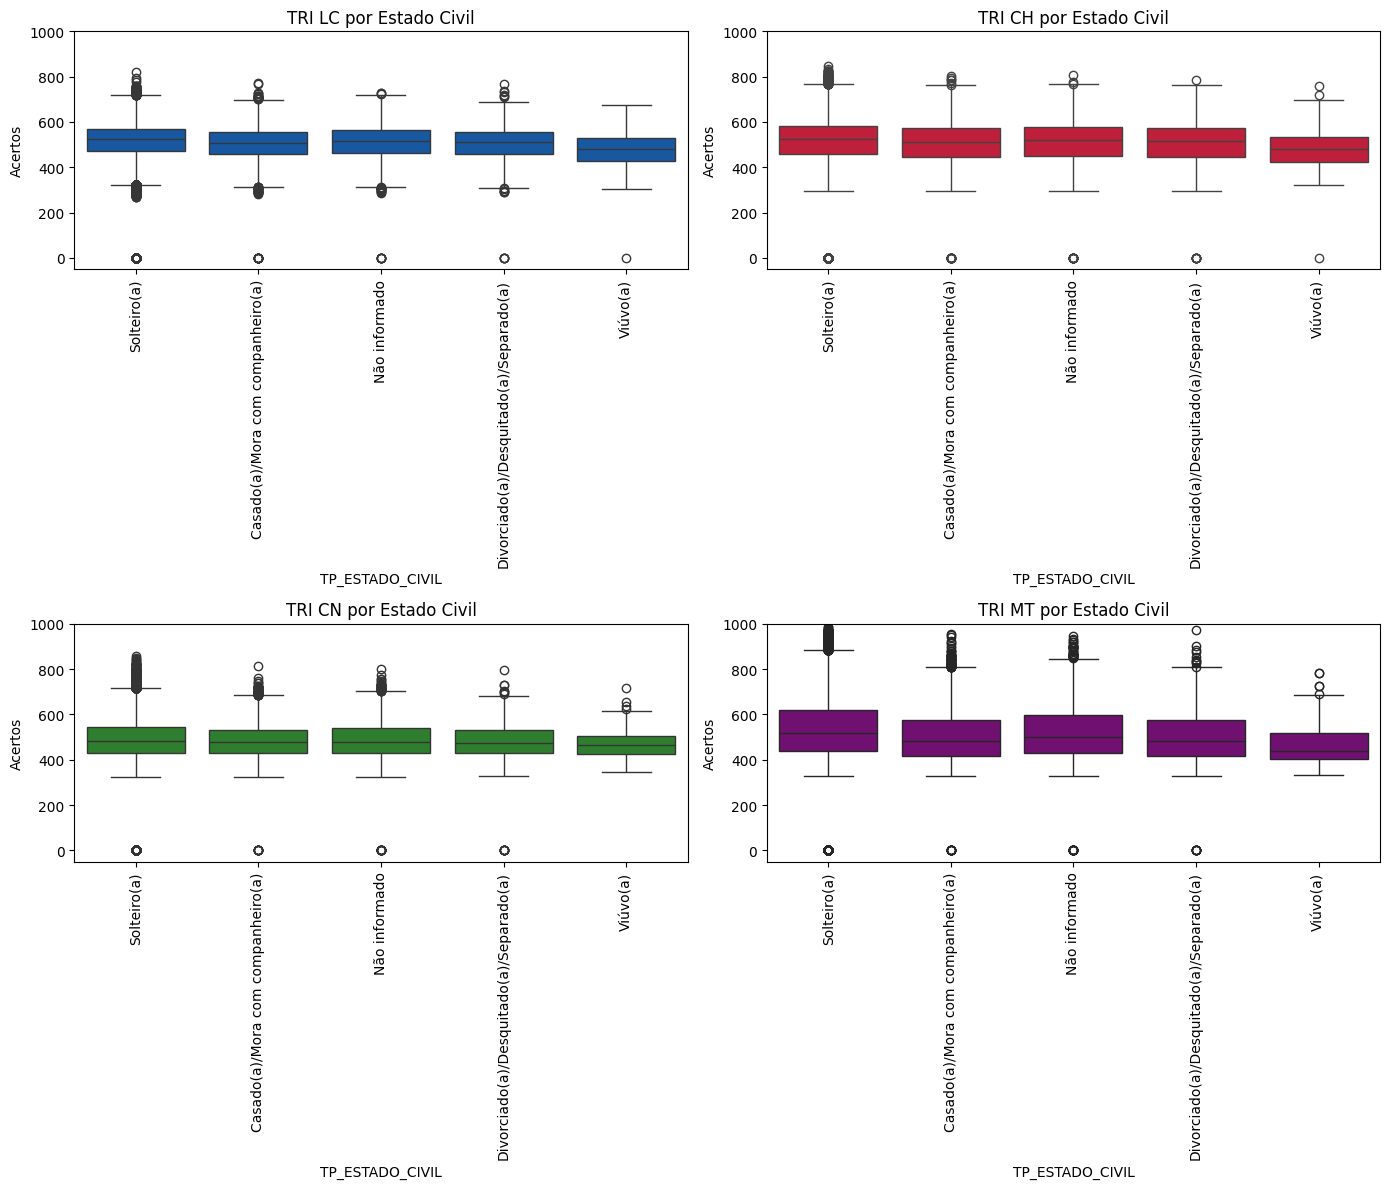

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_ESTADO_CIVIL', y=coluna, color=cores_materias[coluna])


    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(-50, 1000)
    # Adicionando título e rótulos
    plt.title(f'{coluna} por Estado Civil')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

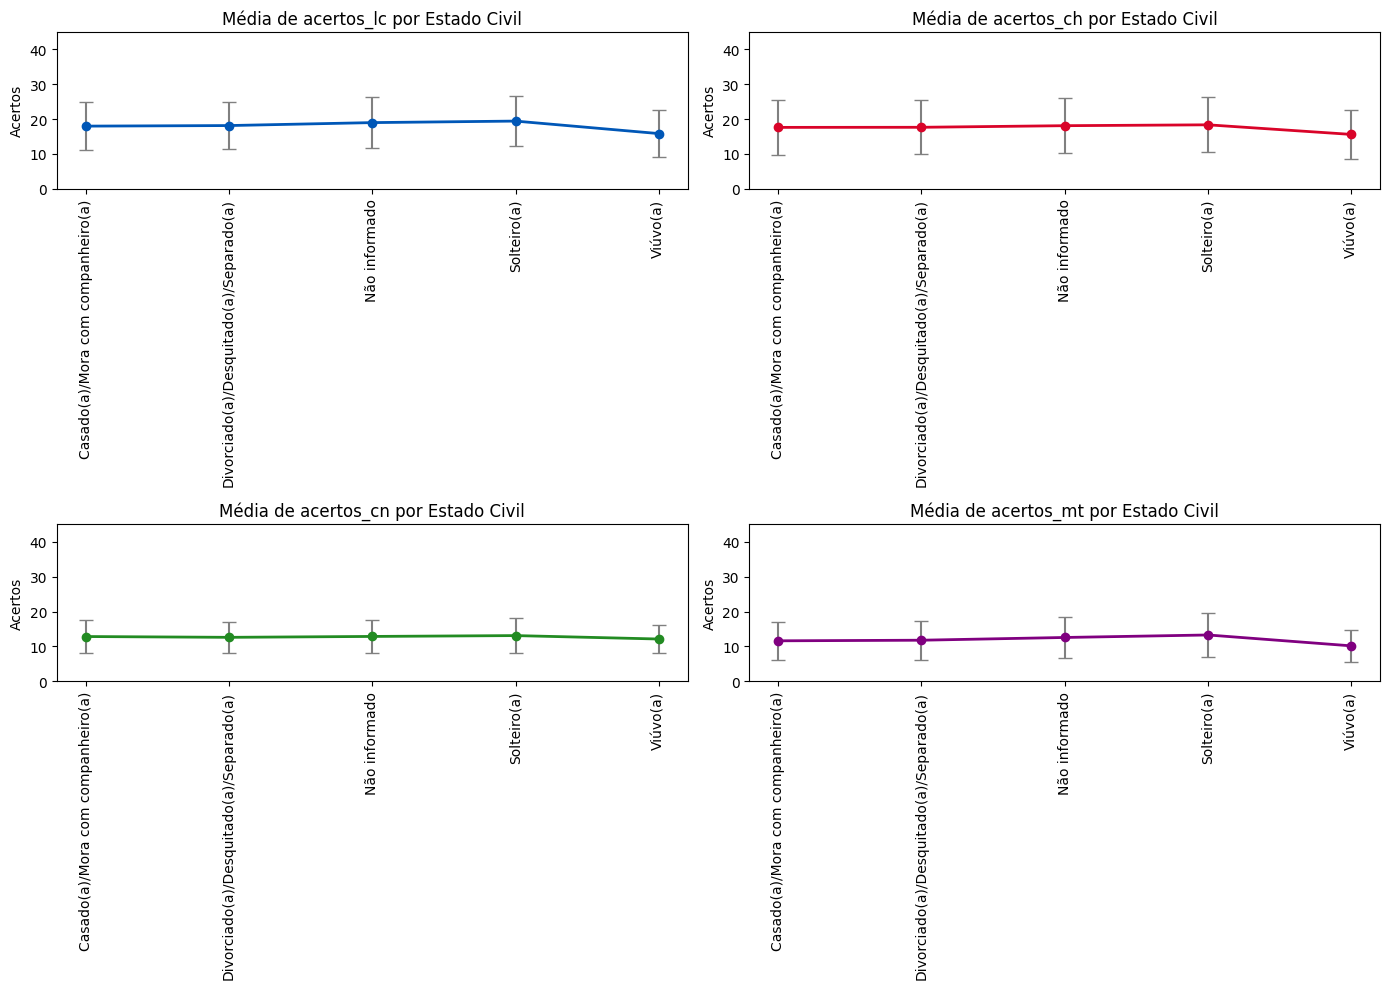

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_ESTADO_CIVIL')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_ESTADO_CIVIL')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Estado Civil')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

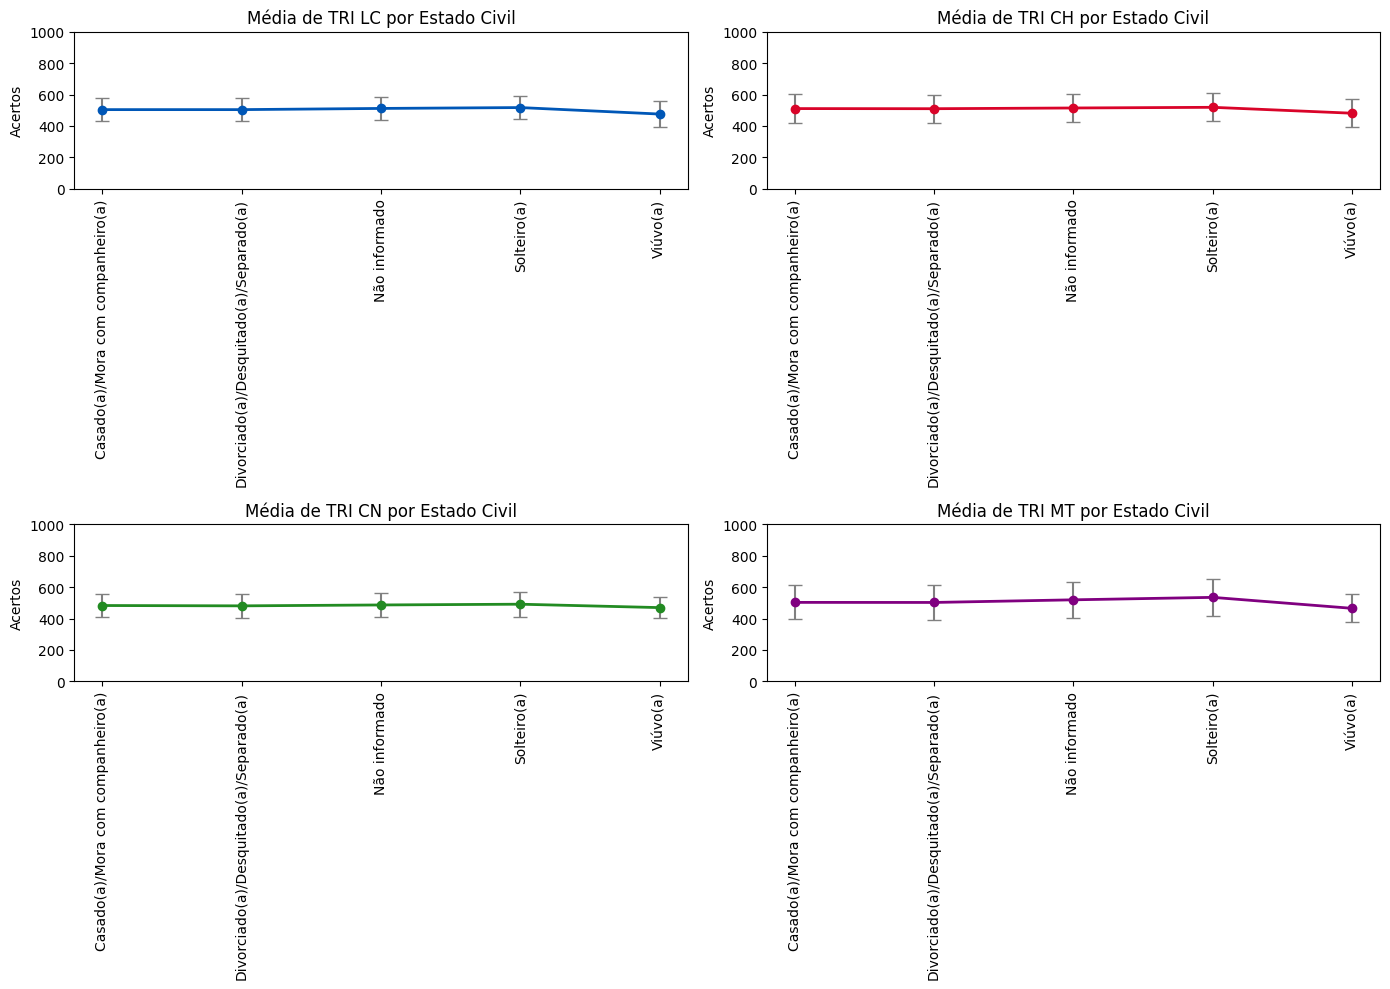

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_ESTADO_CIVIL')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_ESTADO_CIVIL')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Estado Civil')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

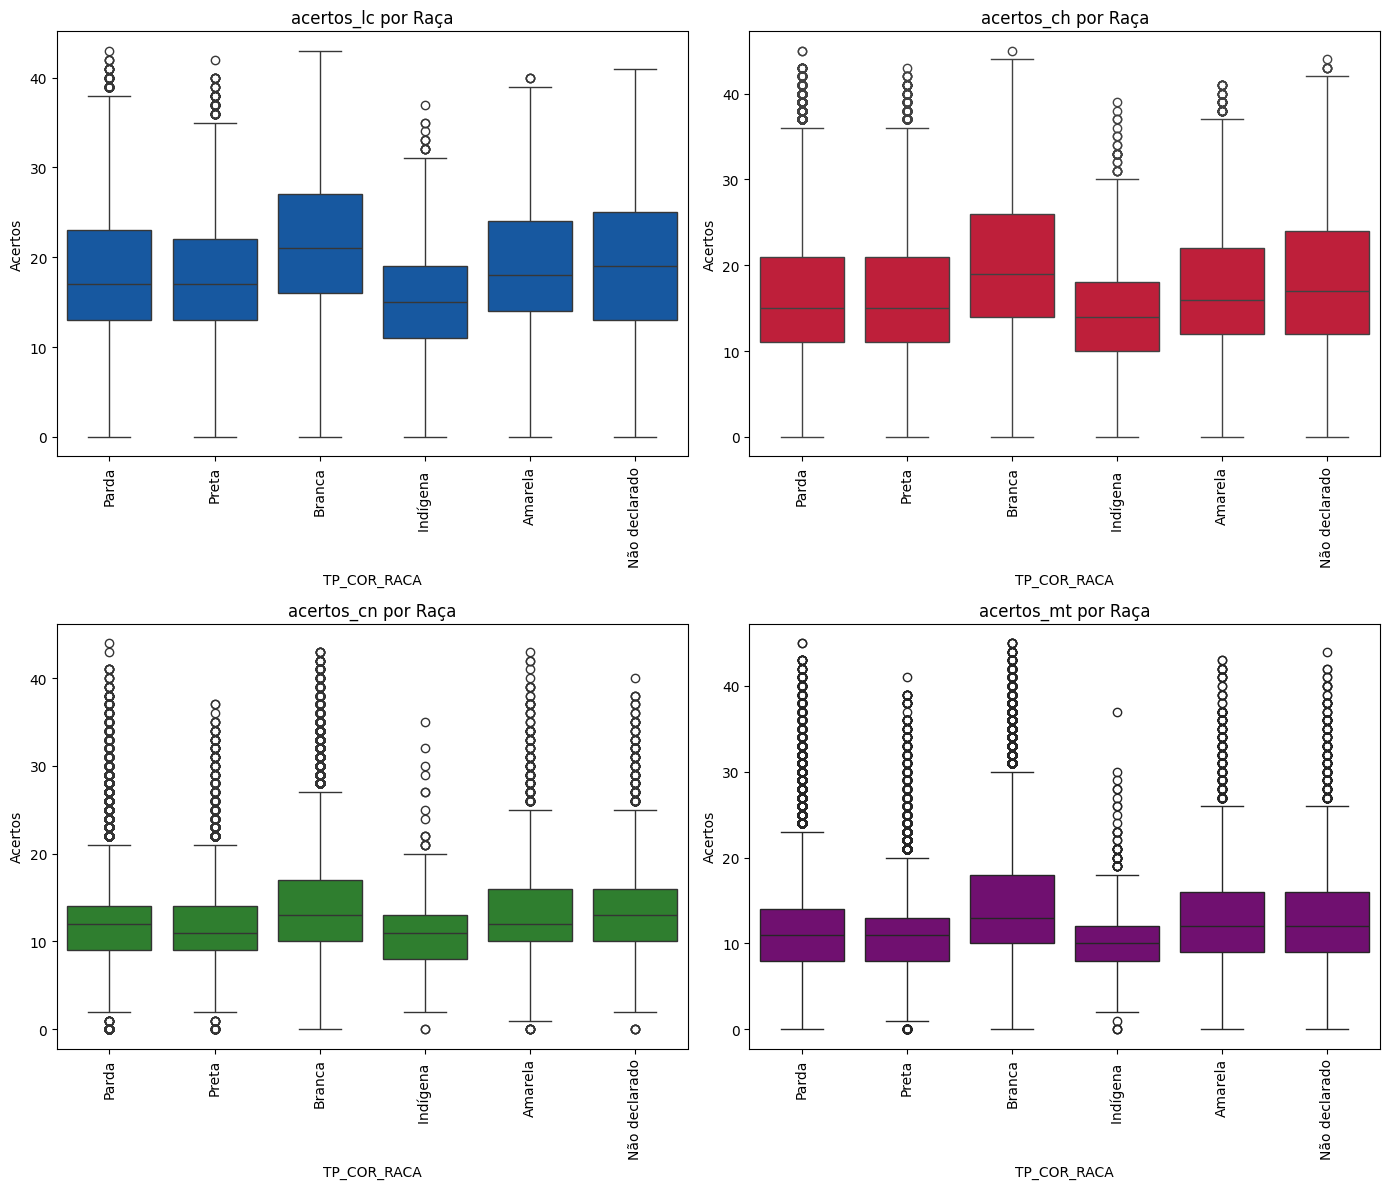

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_COR_RACA', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Raça')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

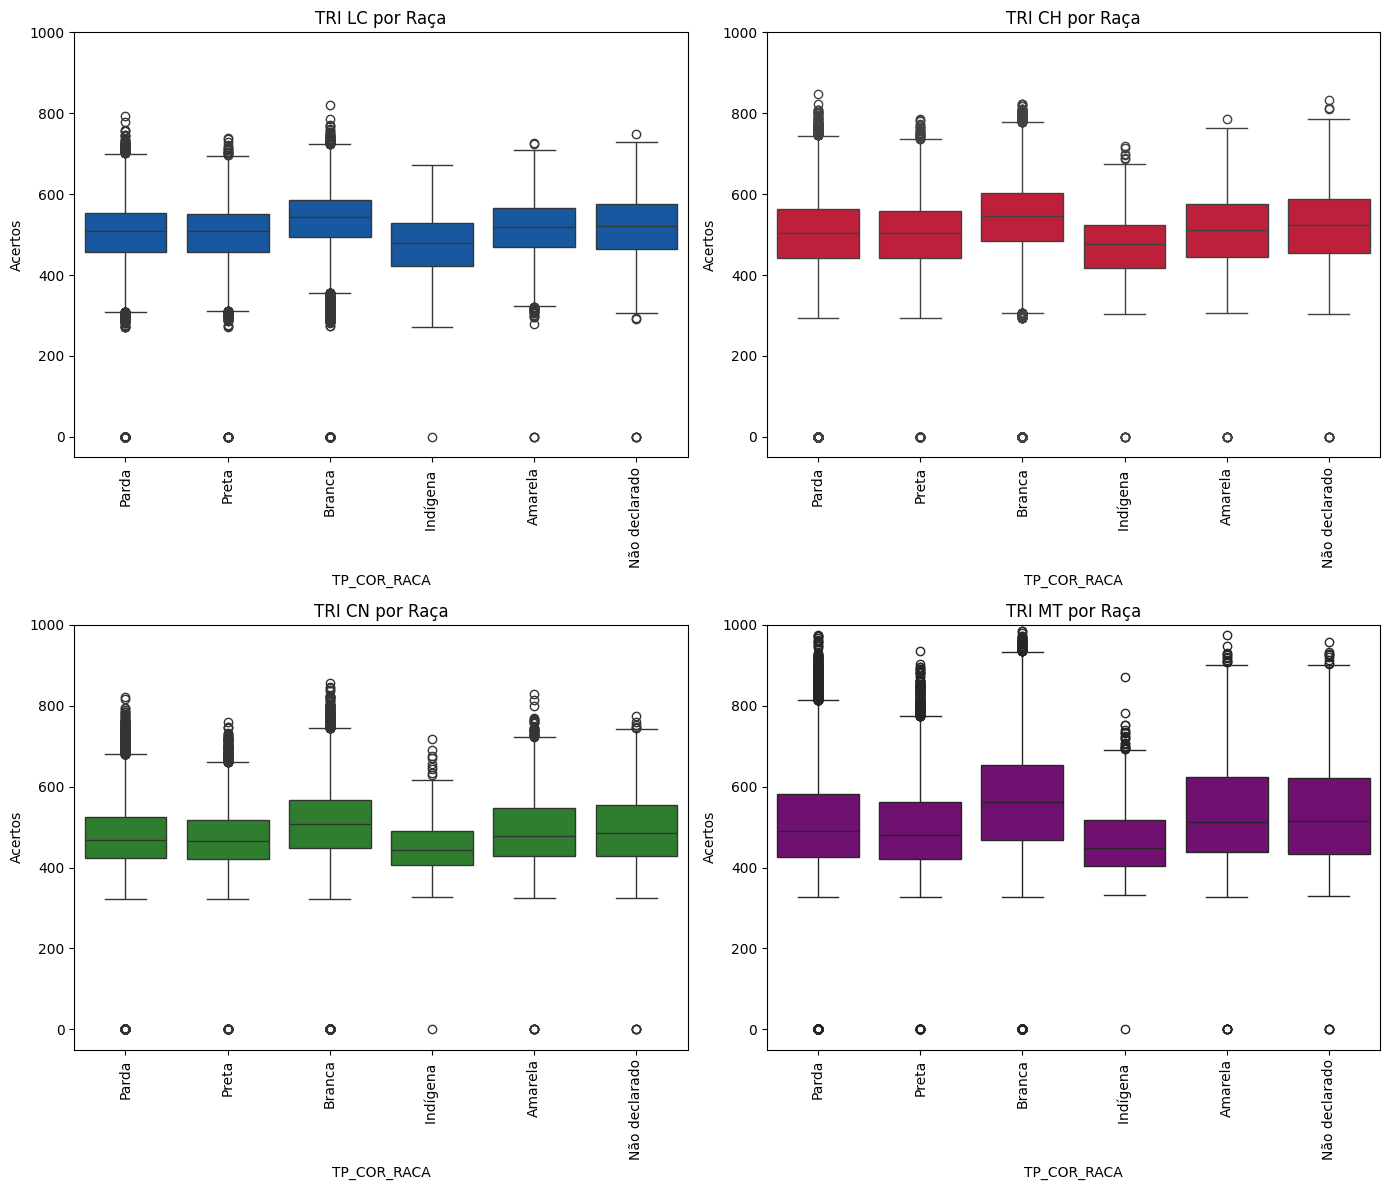

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_COR_RACA', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Raça')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    plt.ylim(-50, 1000)
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

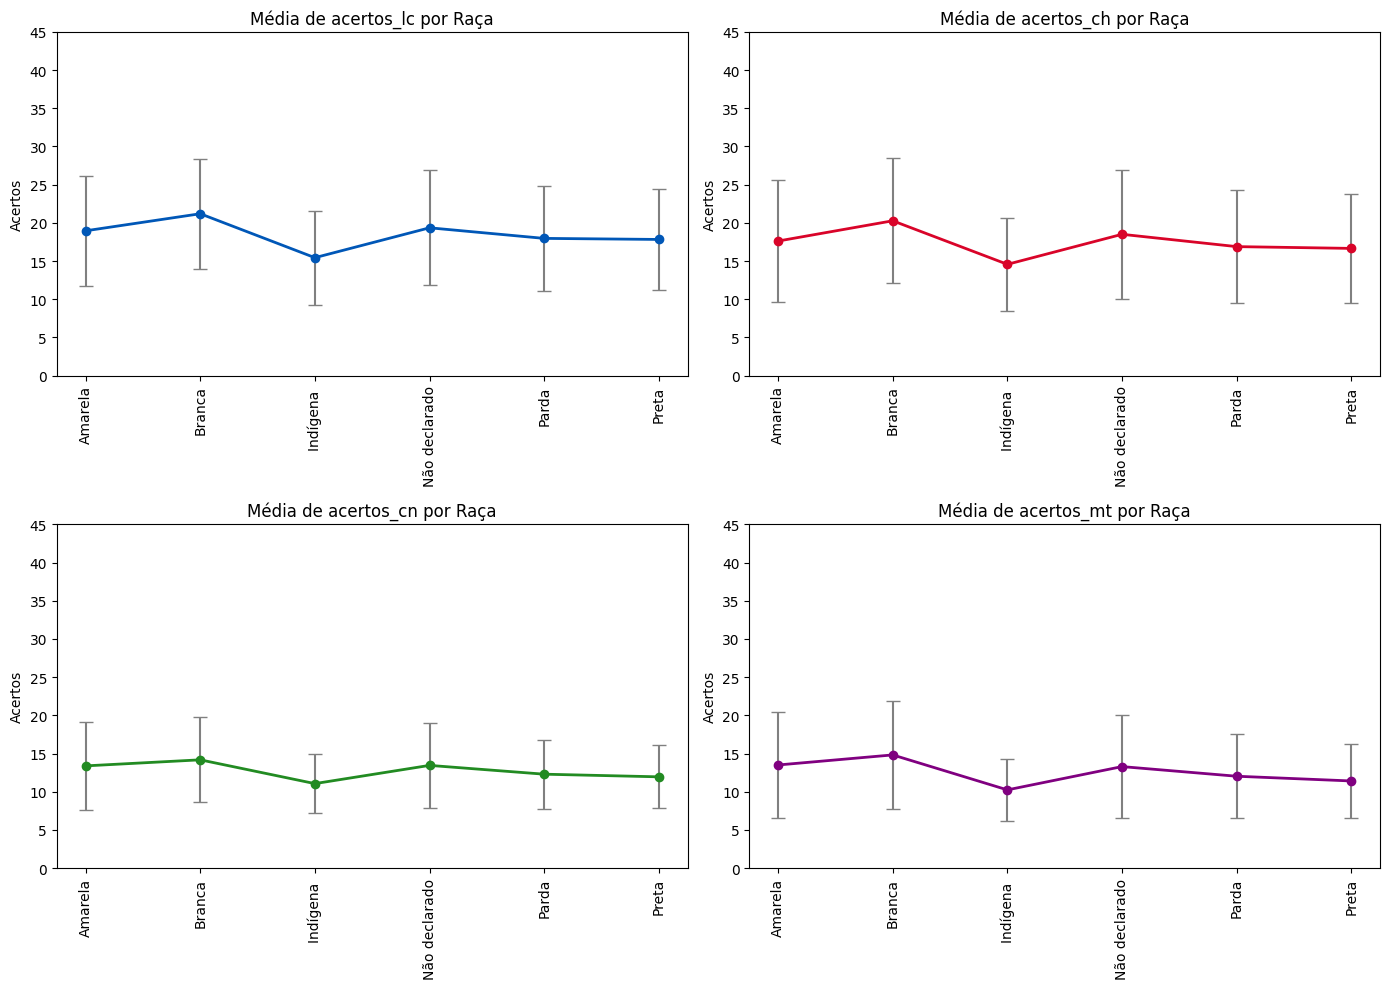

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_COR_RACA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_COR_RACA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Raça')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

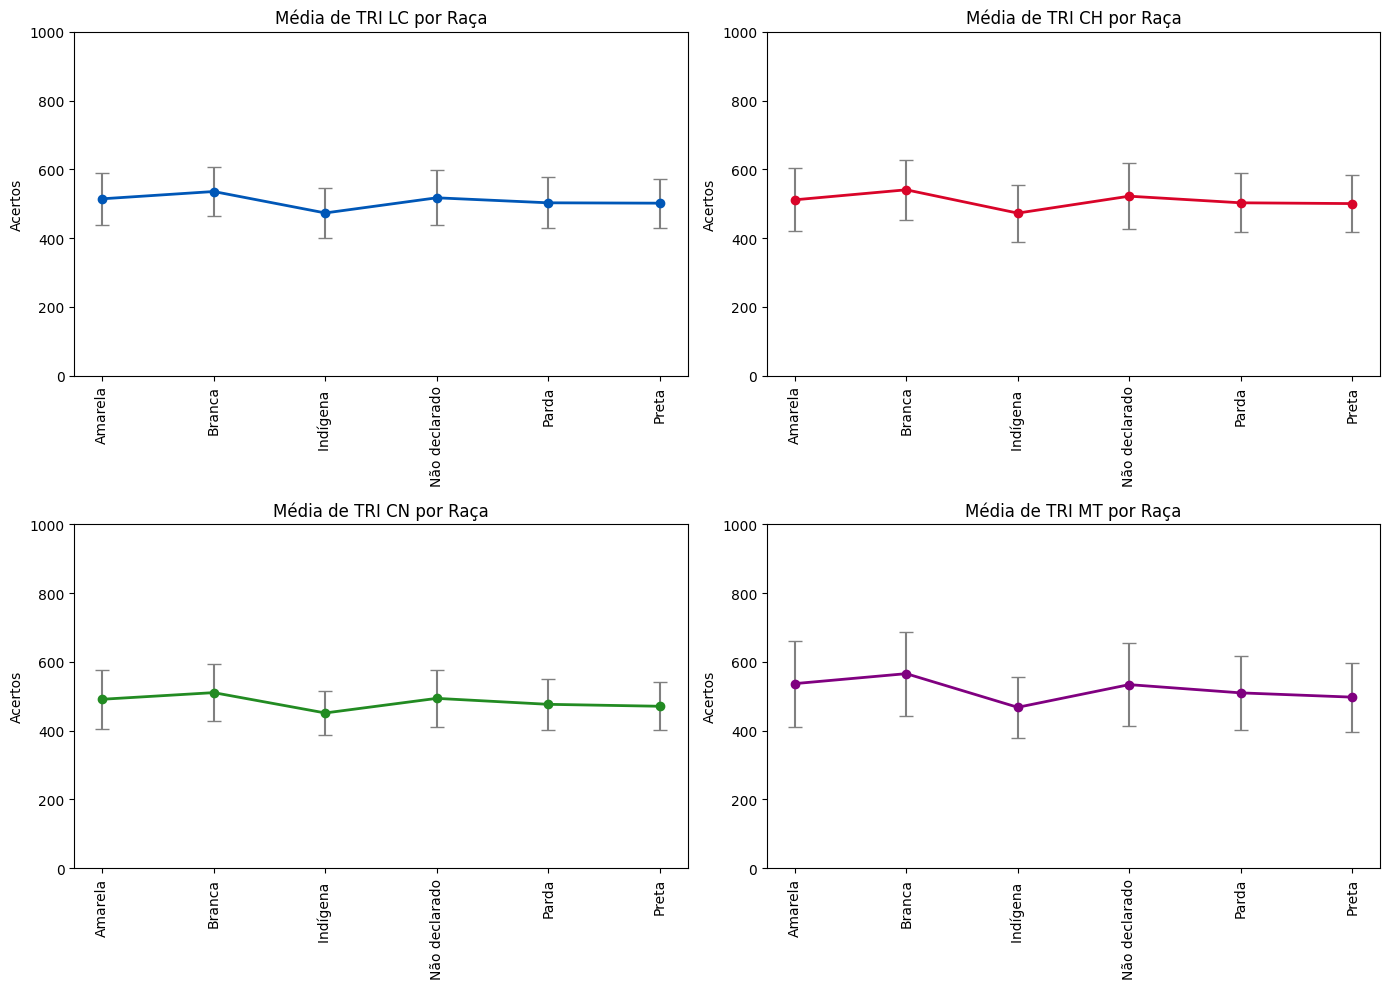

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_COR_RACA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_COR_RACA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Raça')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

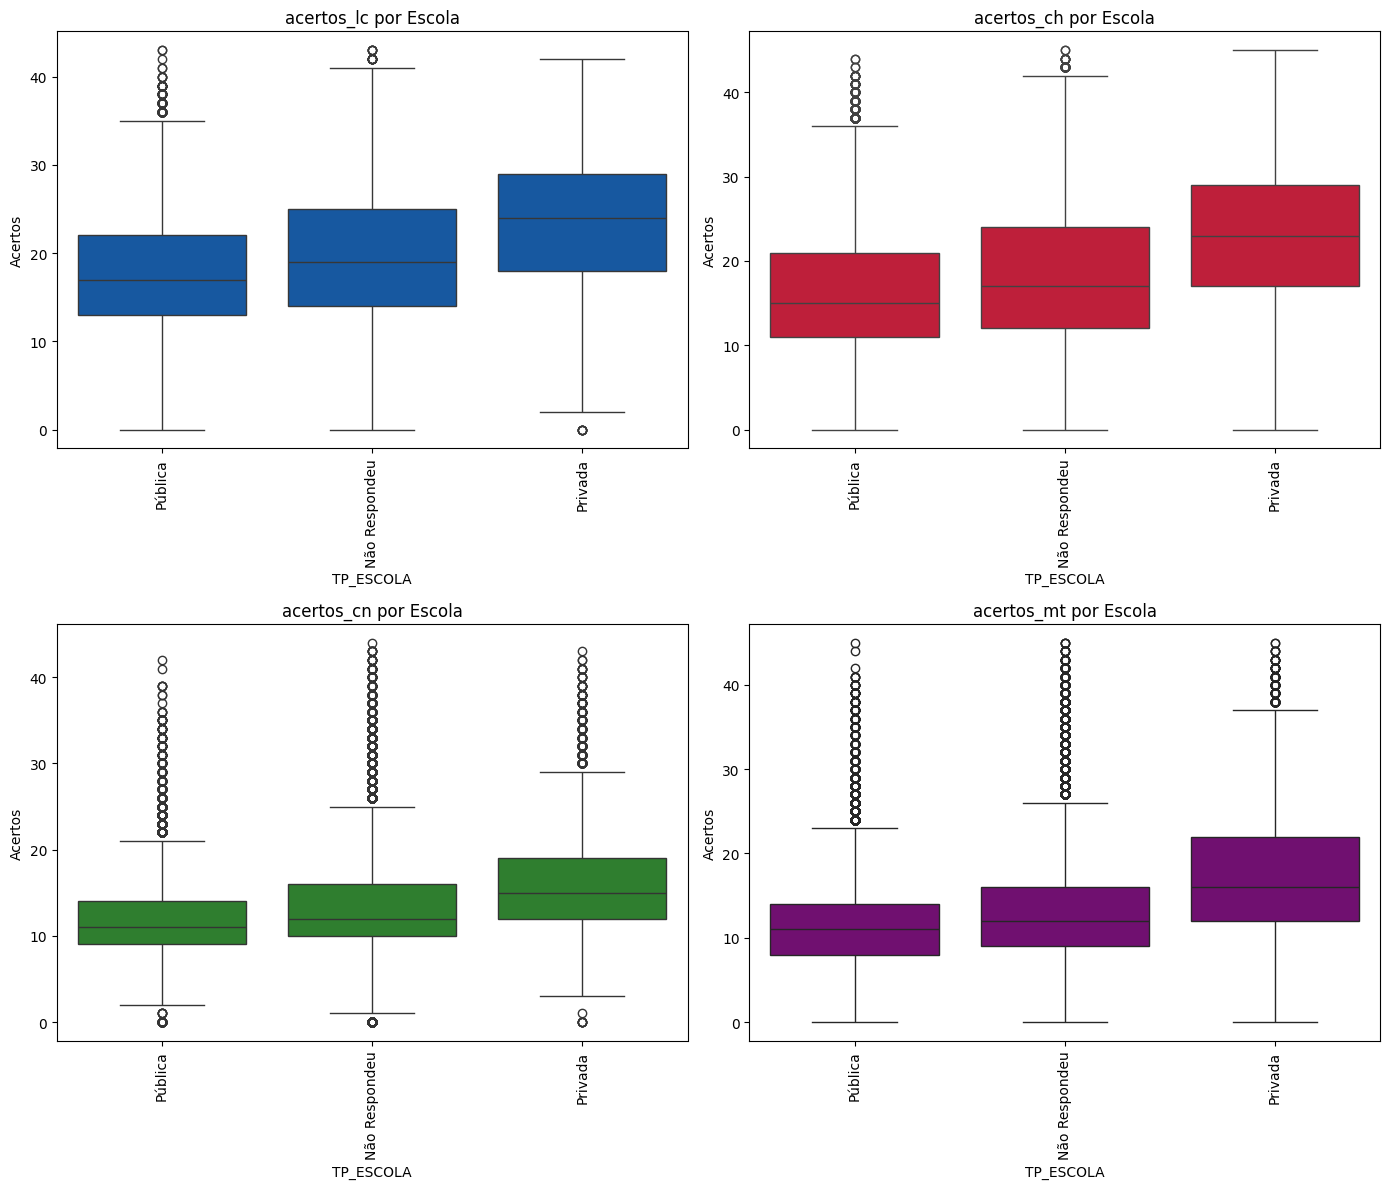

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_ESCOLA', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Escola')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

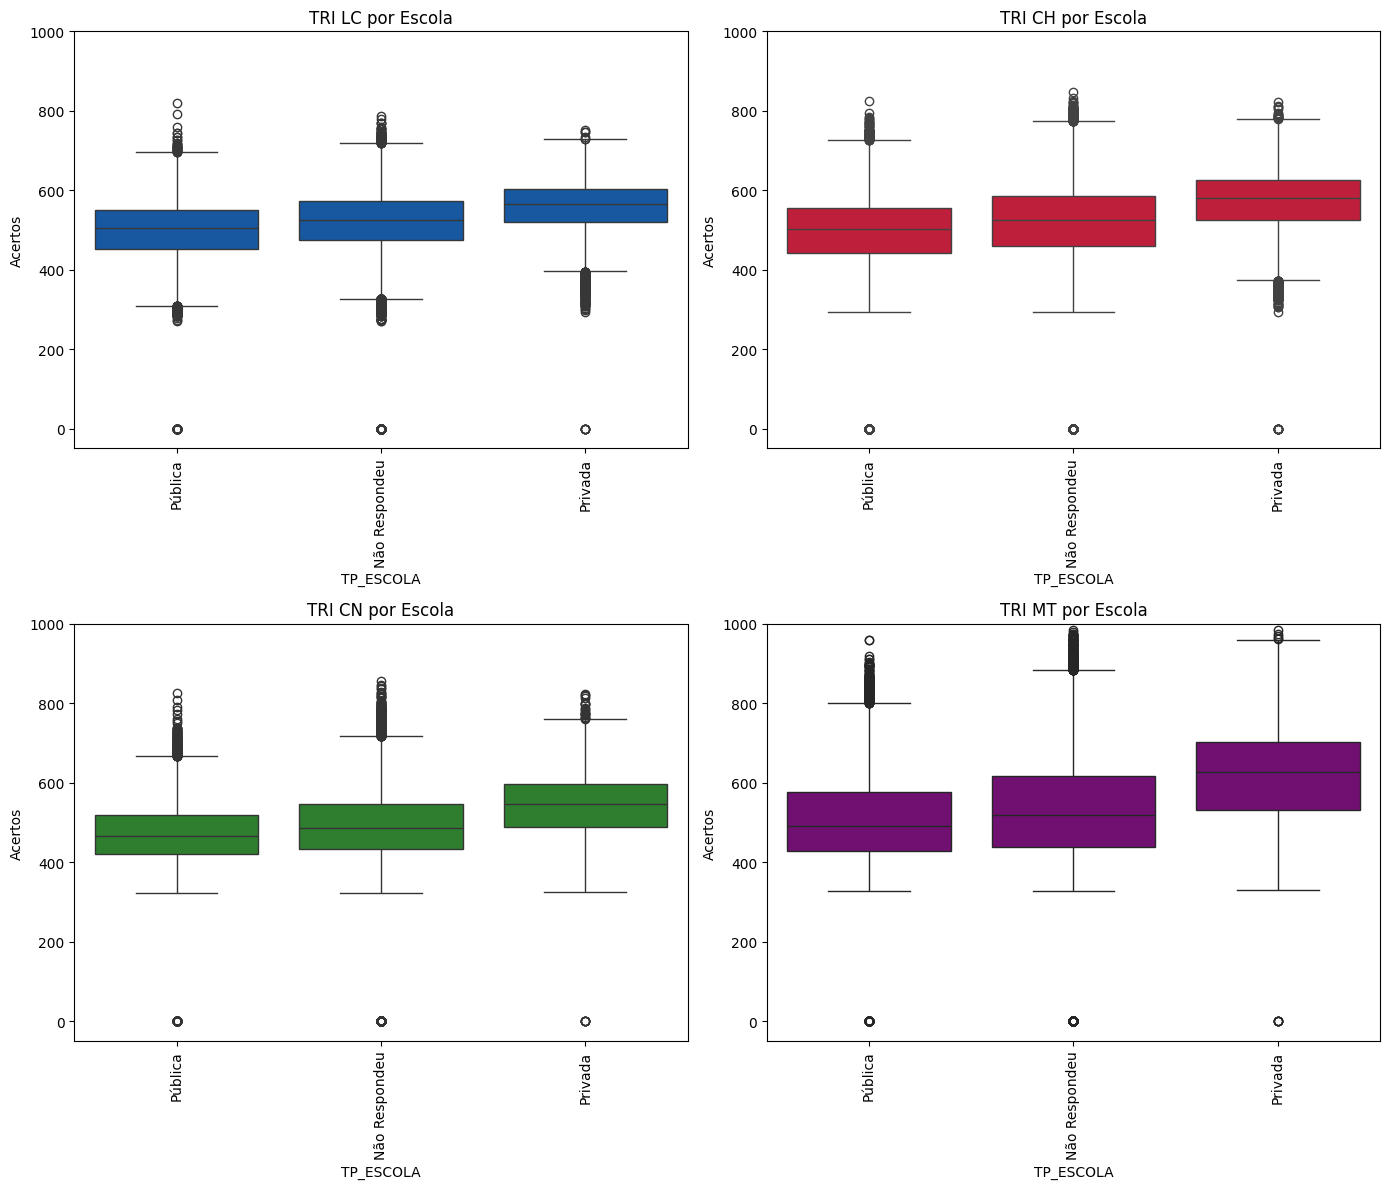

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='TP_ESCOLA', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Escola')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    plt.ylim(-50, 1000)
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

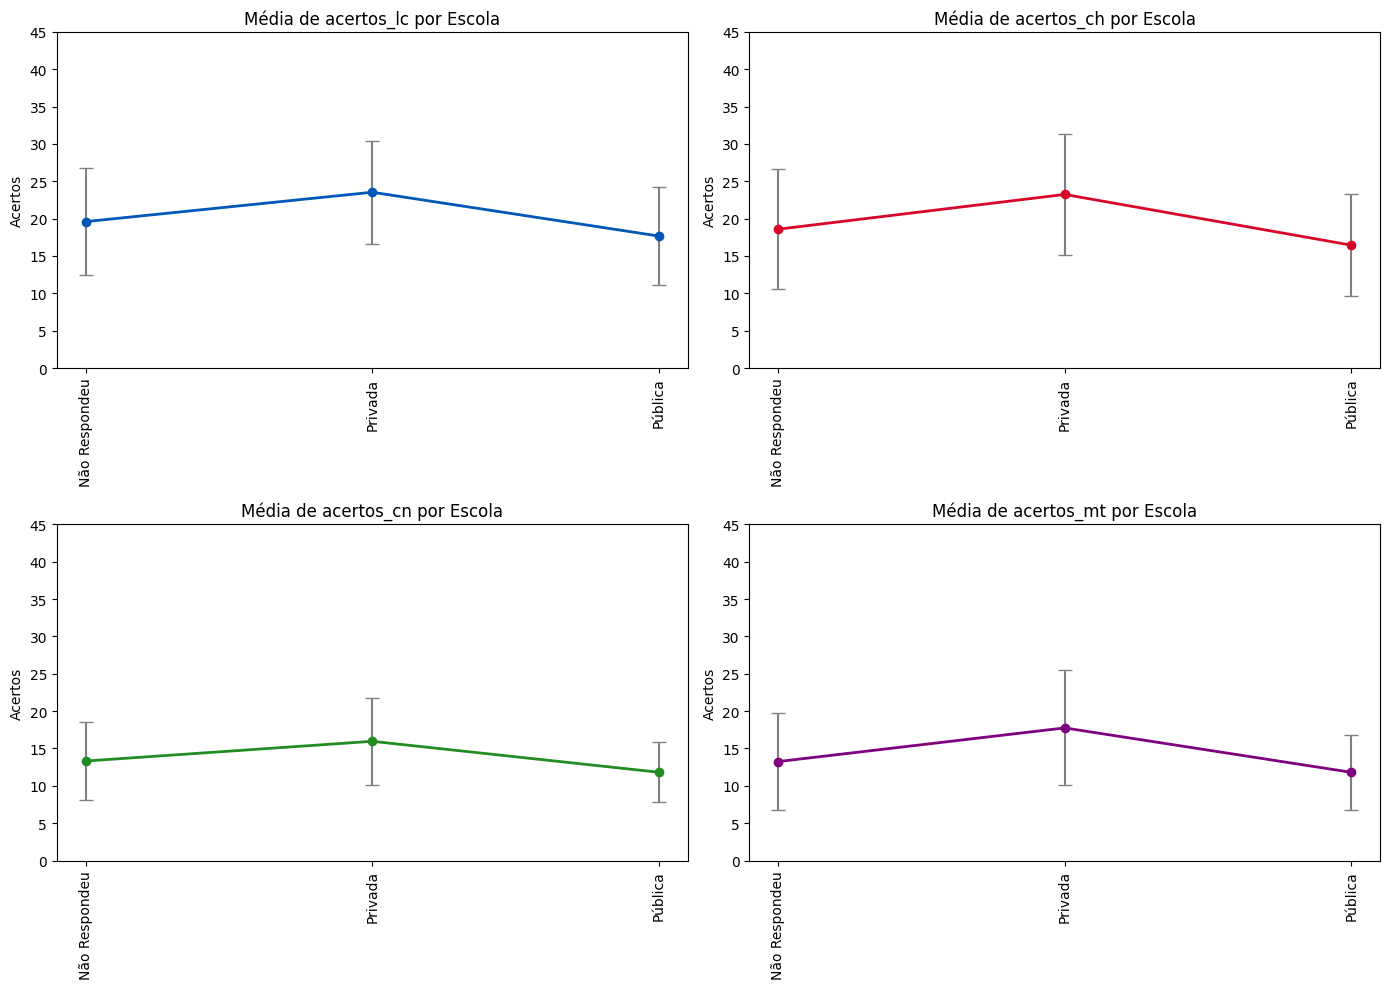

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_ESCOLA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_ESCOLA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Escola')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

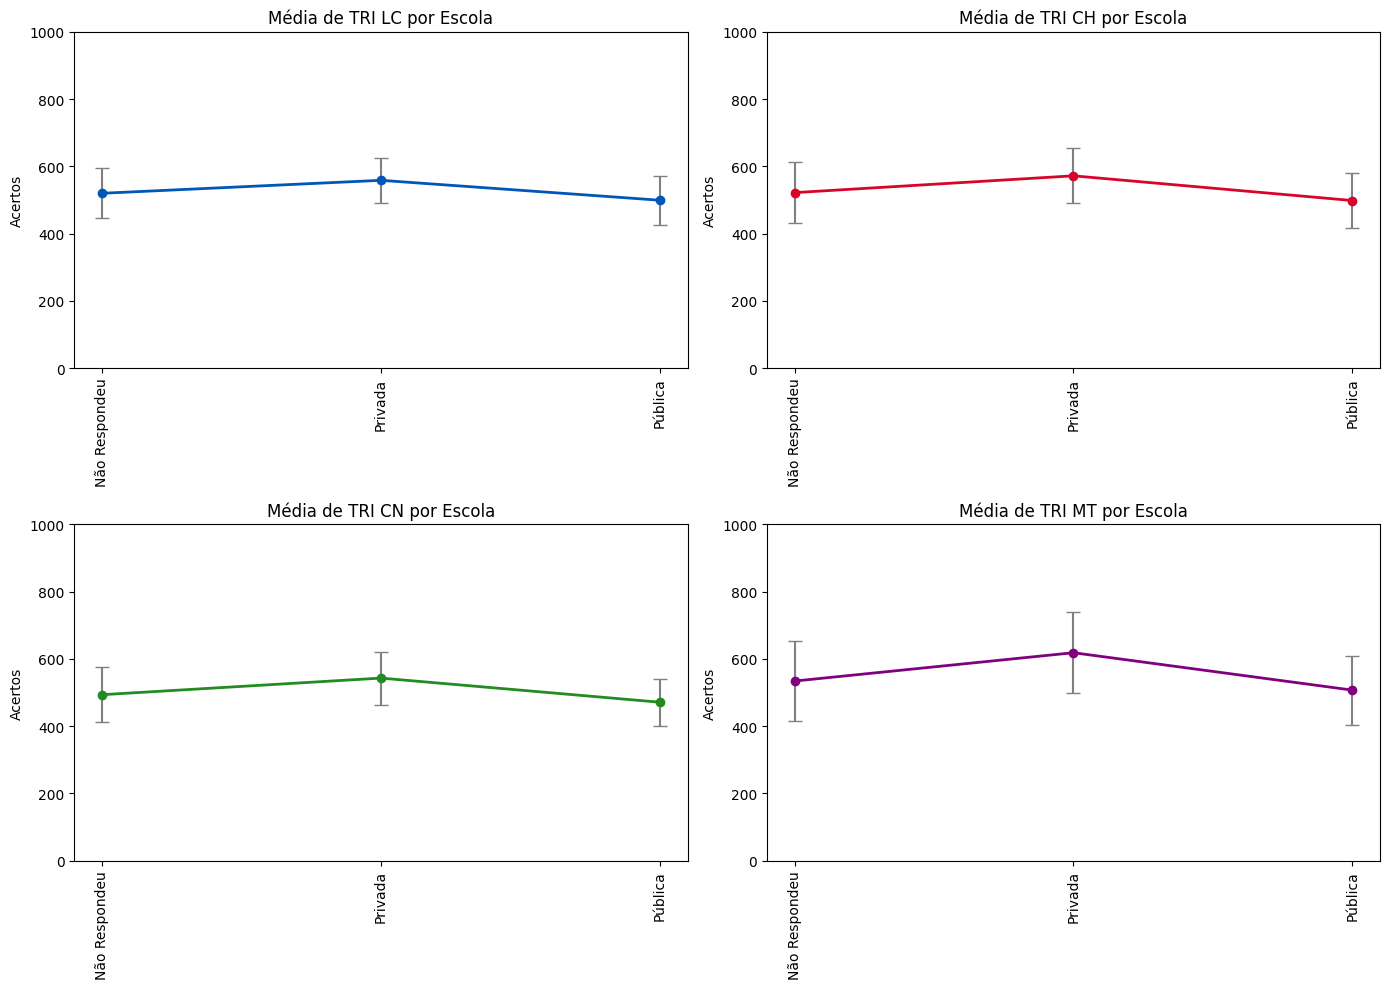

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('TP_ESCOLA')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('TP_ESCOLA')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Escola')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

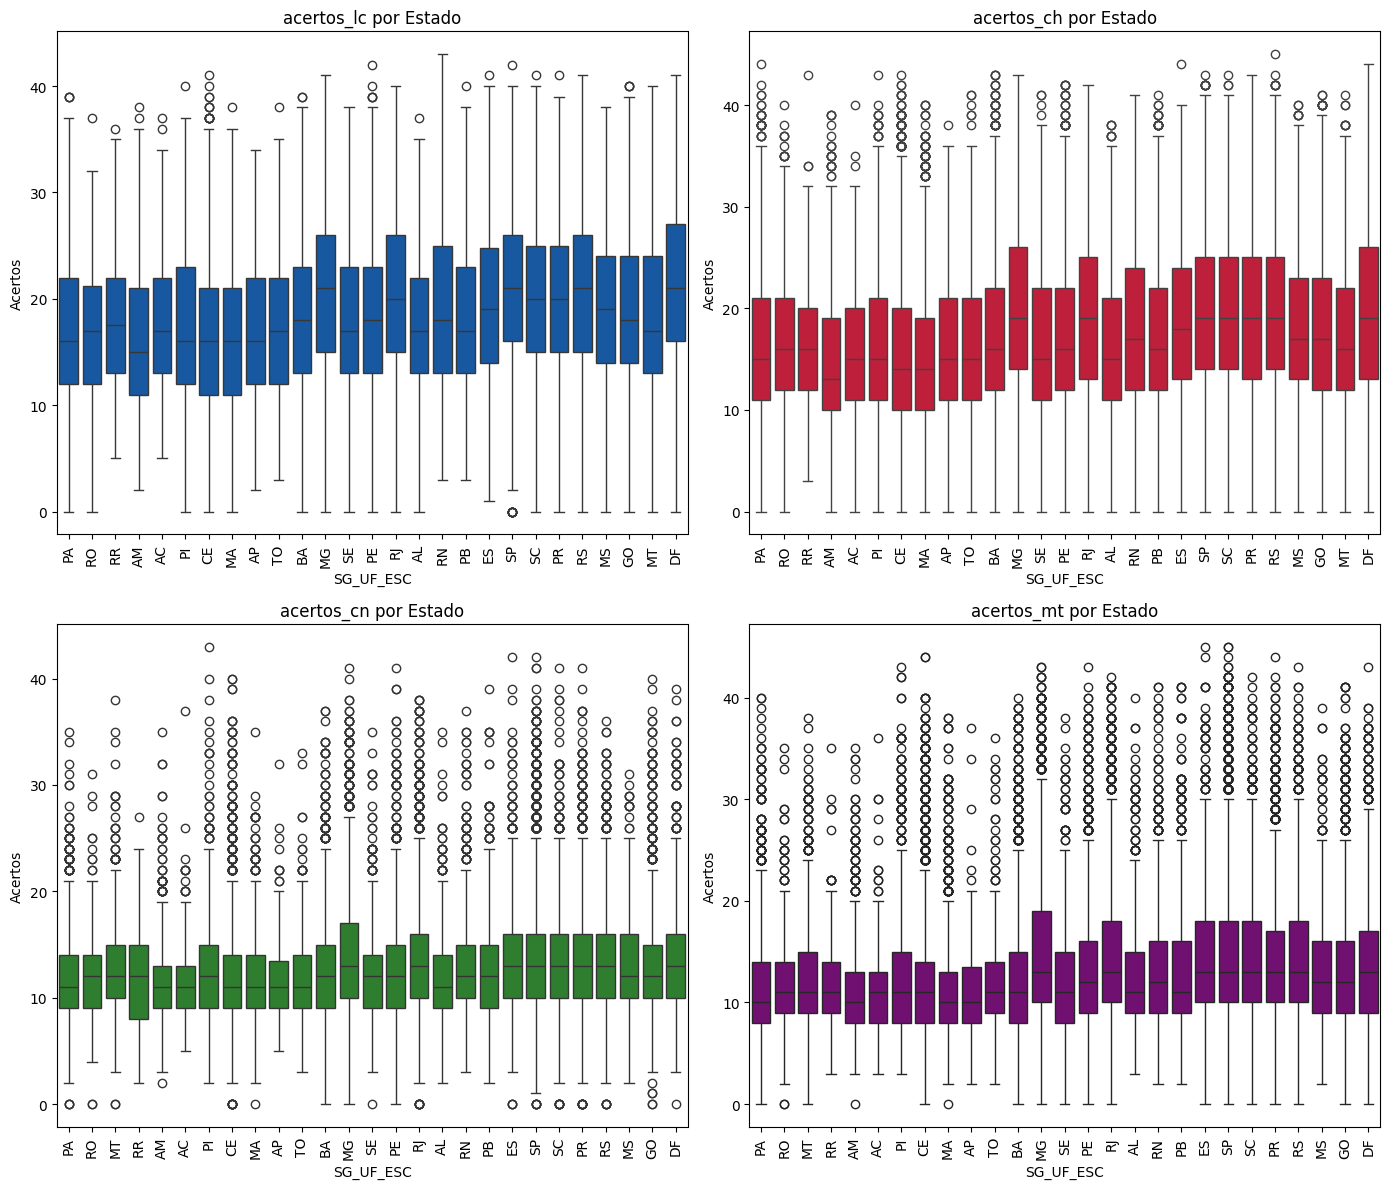

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='SG_UF_ESC', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Estado')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

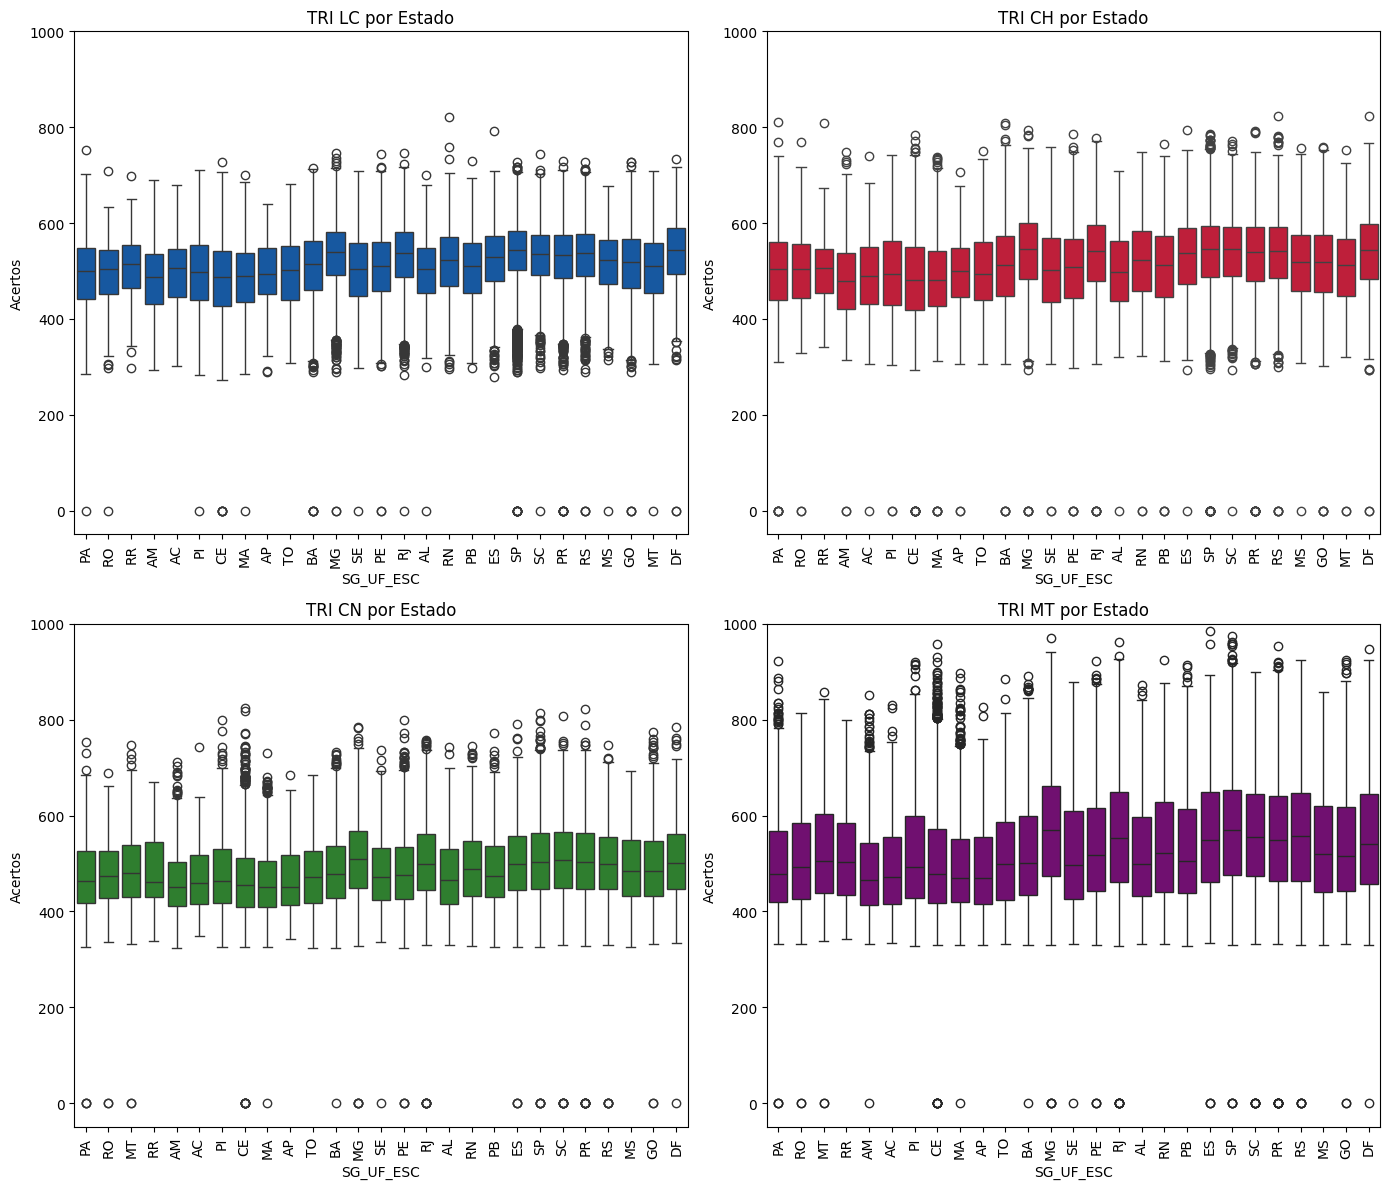

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='SG_UF_ESC', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(f'{coluna} por Estado')
    # plt.xlabel('Estado Civil (TP_ESTADO_CIVIL)')
    plt.ylabel('Acertos')

    plt.ylim(-50, 1000)
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

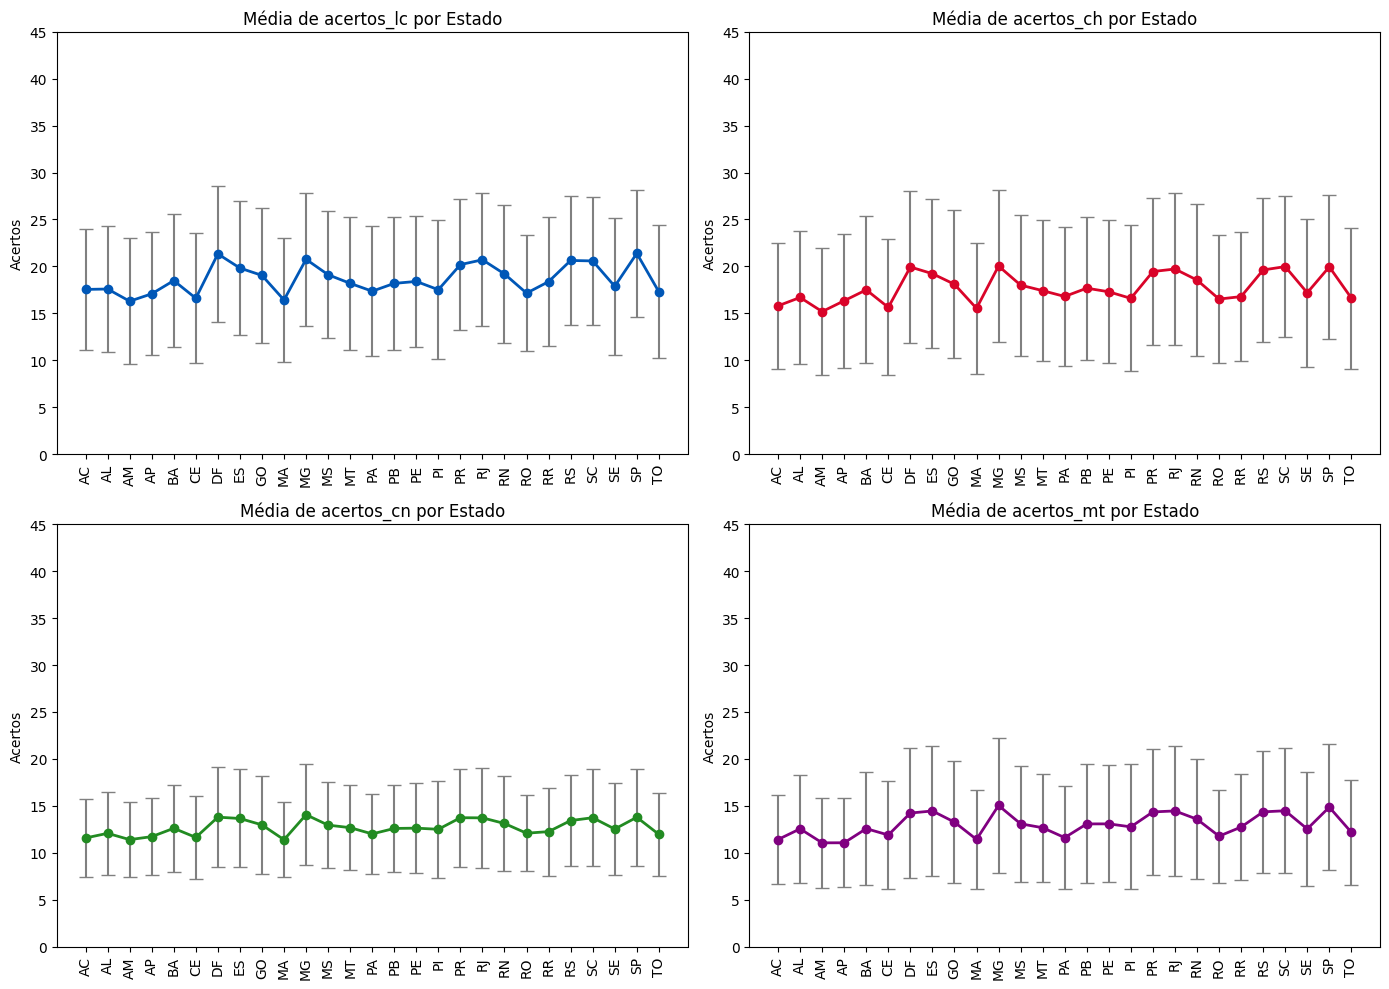

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('SG_UF_ESC')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('SG_UF_ESC')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Estado')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

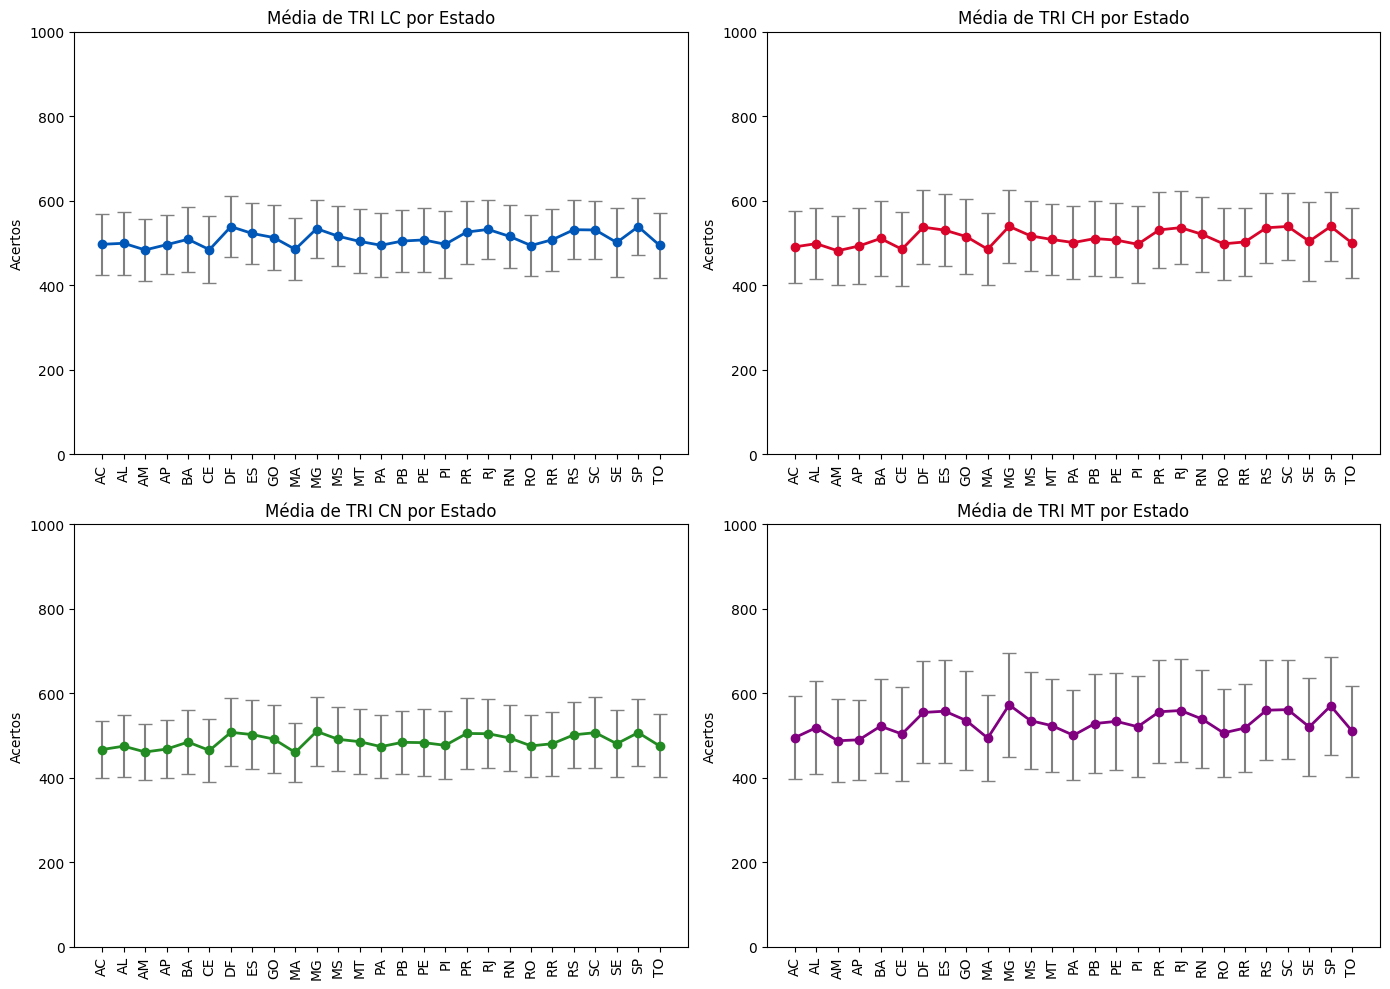

In [ ]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('SG_UF_ESC')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('SG_UF_ESC')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(f'Média de {coluna} por Estado')
    plt.ylabel(f'Acertos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

In [ ]:
# Dicionário de cores por matéria
cores_materias = {
    'lc': '#0057b7',   # Azul forte
    'ch': '#d90429',   # Vermelho forte
    'cn': '#228B22',   # Verde vegano
    'mt': '#800080'    # Roxo potente
}

# Lista de matérias e suas respectivas colunas de nota
notas = {
    'lc': 'acertos_lc',
    'ch': 'acertos_ch',
    'cn': 'acertos_cn',
    'mt': 'acertos_mt'
}

colormap_materias = {
    'lc': 'Blues',
    'ch': 'Reds',
    'cn': 'Greens',
    'mt': 'Purples'
}

In [ ]:
df_2023 = df_traduzido[df_traduzido['NU_ANO'] == 2023]

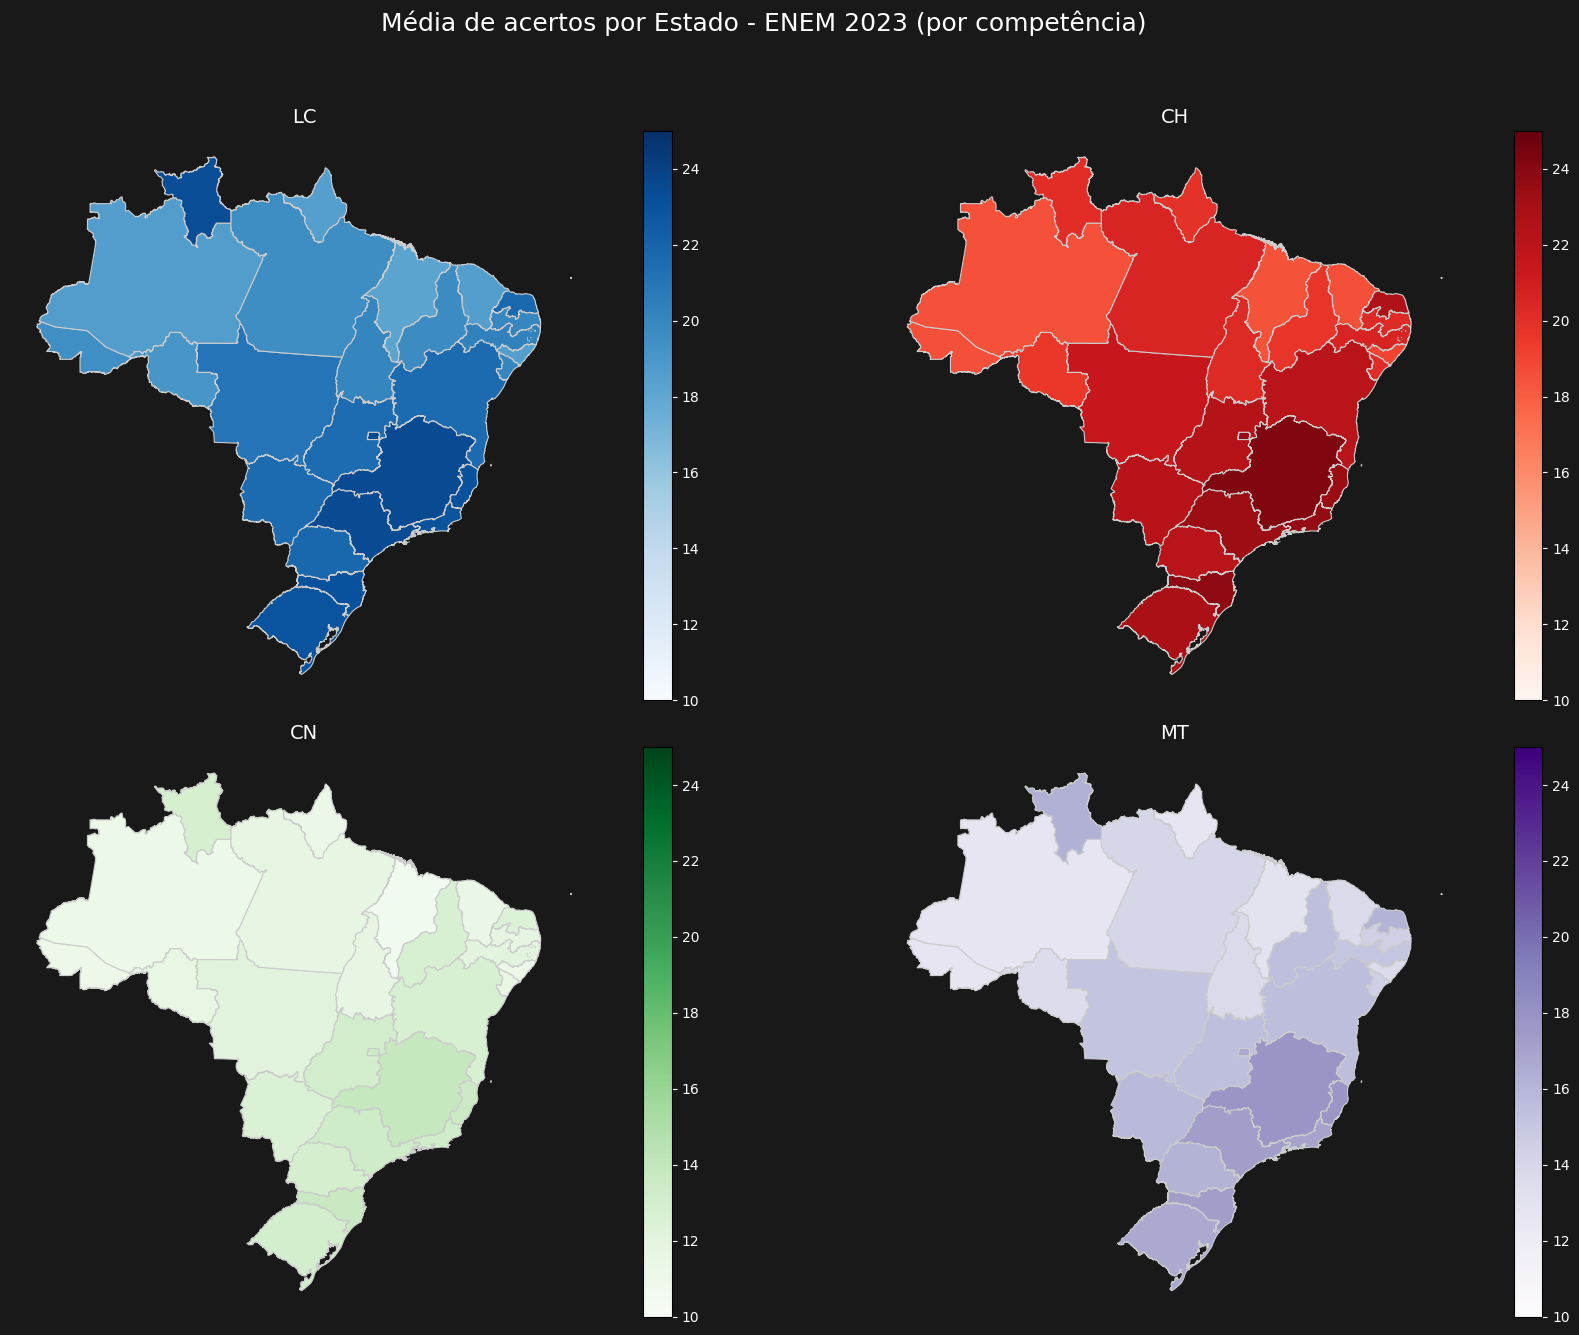

In [ ]:
# %%
# Filtra alunos com todas as notas maiores que 1
df_validos = df_2023.copy()

# Calcula a nota média entre as 4 competências
df_validos['NOTA_MEDIA'] = df_validos[['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']].mean(axis=1)

# Agrupa por estado e calcula a média das notas
media_por_estado = df_validos.groupby('SG_UF_ESC')['NOTA_MEDIA'].mean().reset_index()

# %%
import geopandas as gpd
import matplotlib.pyplot as plt

# Lê o arquivo GeoJSON local
estados = gpd.read_file('br_states.json')

# Junta com as notas médias (SIGLA no GeoJSON <-> SG_UF_ESC no df de notas)
estados_notas = estados.merge(media_por_estado, left_on='SIGLA', right_on='SG_UF_ESC')

fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor('#191919')  # Fundo do gráfico principal
plt.suptitle('Média de acertos por Estado - ENEM 2023 (por competência)', fontsize=18, color='white')

for ax, (sigla, coluna) in zip(axs.flat, notas.items()):
    media = df_validos.groupby('SG_UF_ESC')[coluna].mean().reset_index()
    estados_media = estados.merge(media, left_on='SIGLA', right_on='SG_UF_ESC')

    ax.set_facecolor('#191919')  # Fundo de cada subplot

    plot = estados_media.plot(
        column=coluna,
        cmap=colormap_materias[sigla],
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        ax=ax,
        vmin=10,
        vmax=25
    )

    # Deixa os ticks e rótulos da colorbar brancos
    cbar = plot.get_figure().axes[-1]
    cbar.tick_params(colors='white')
    cbar.yaxis.label.set_color('white')

    ax.set_title(f'{sigla.upper()}', fontsize=14, color='white')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




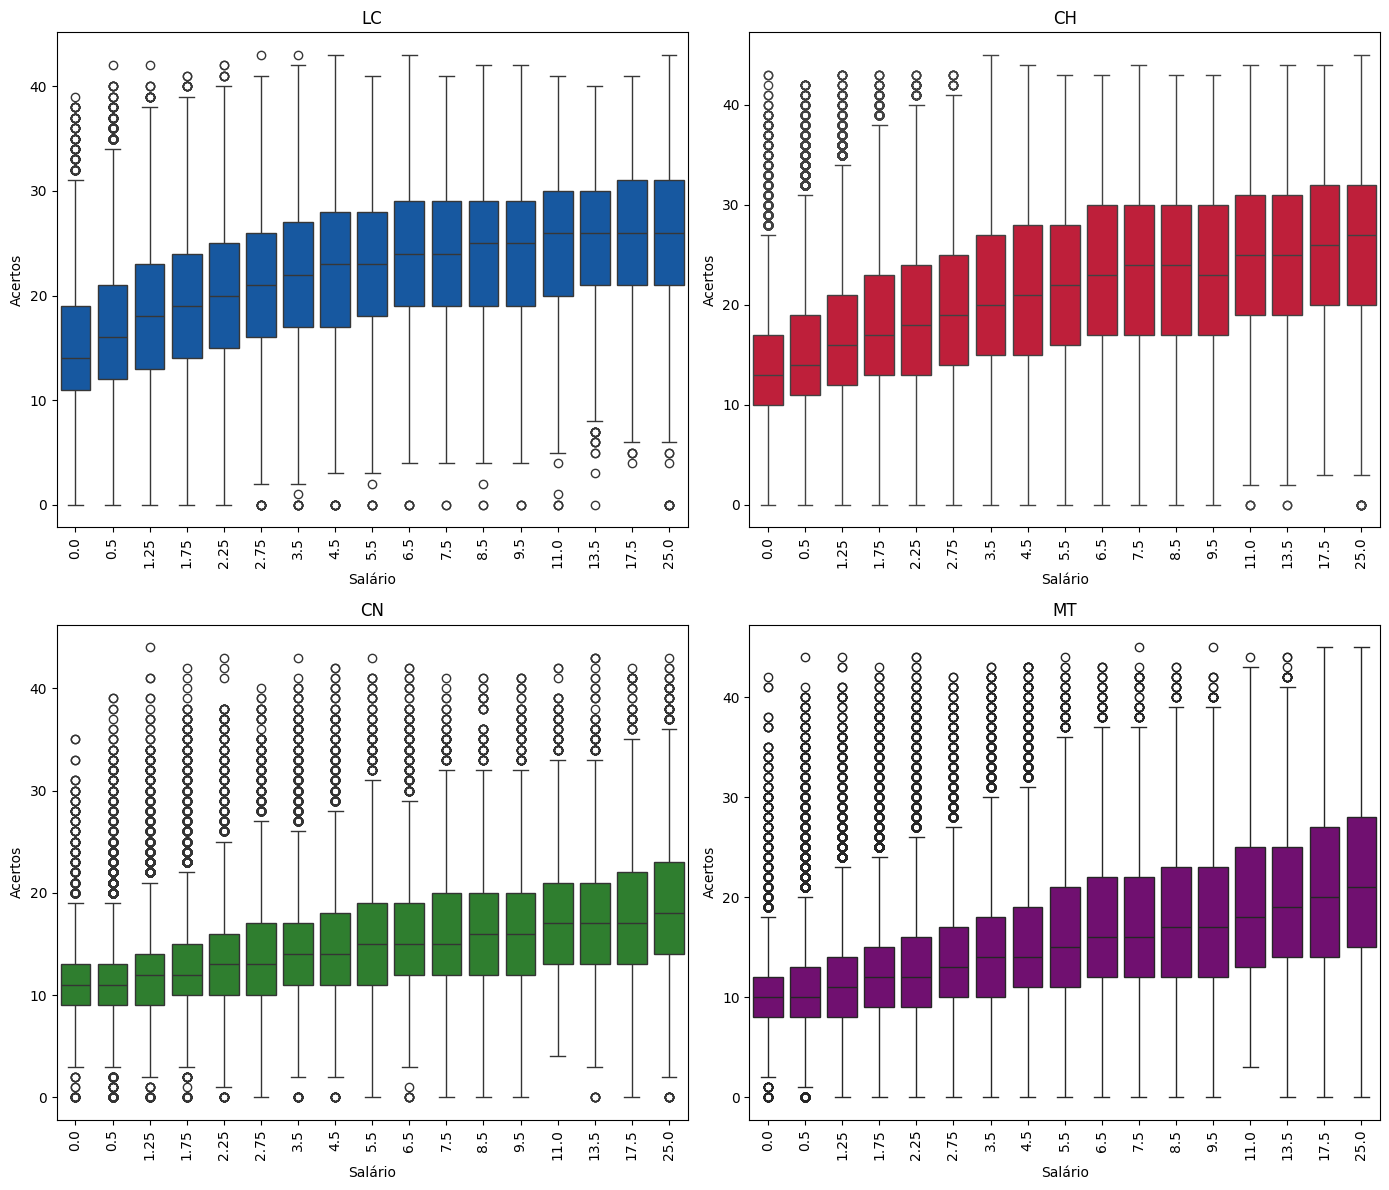

In [19]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

# Lista com os títulos para cada gráfico
titulos = ['LC', 'CH', 'CN', 'MT']

for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='Q006', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(titulos[i])  # Usando os títulos definidos na lista
    plt.xlabel('Salário')
    plt.ylabel('Acertos')

    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()


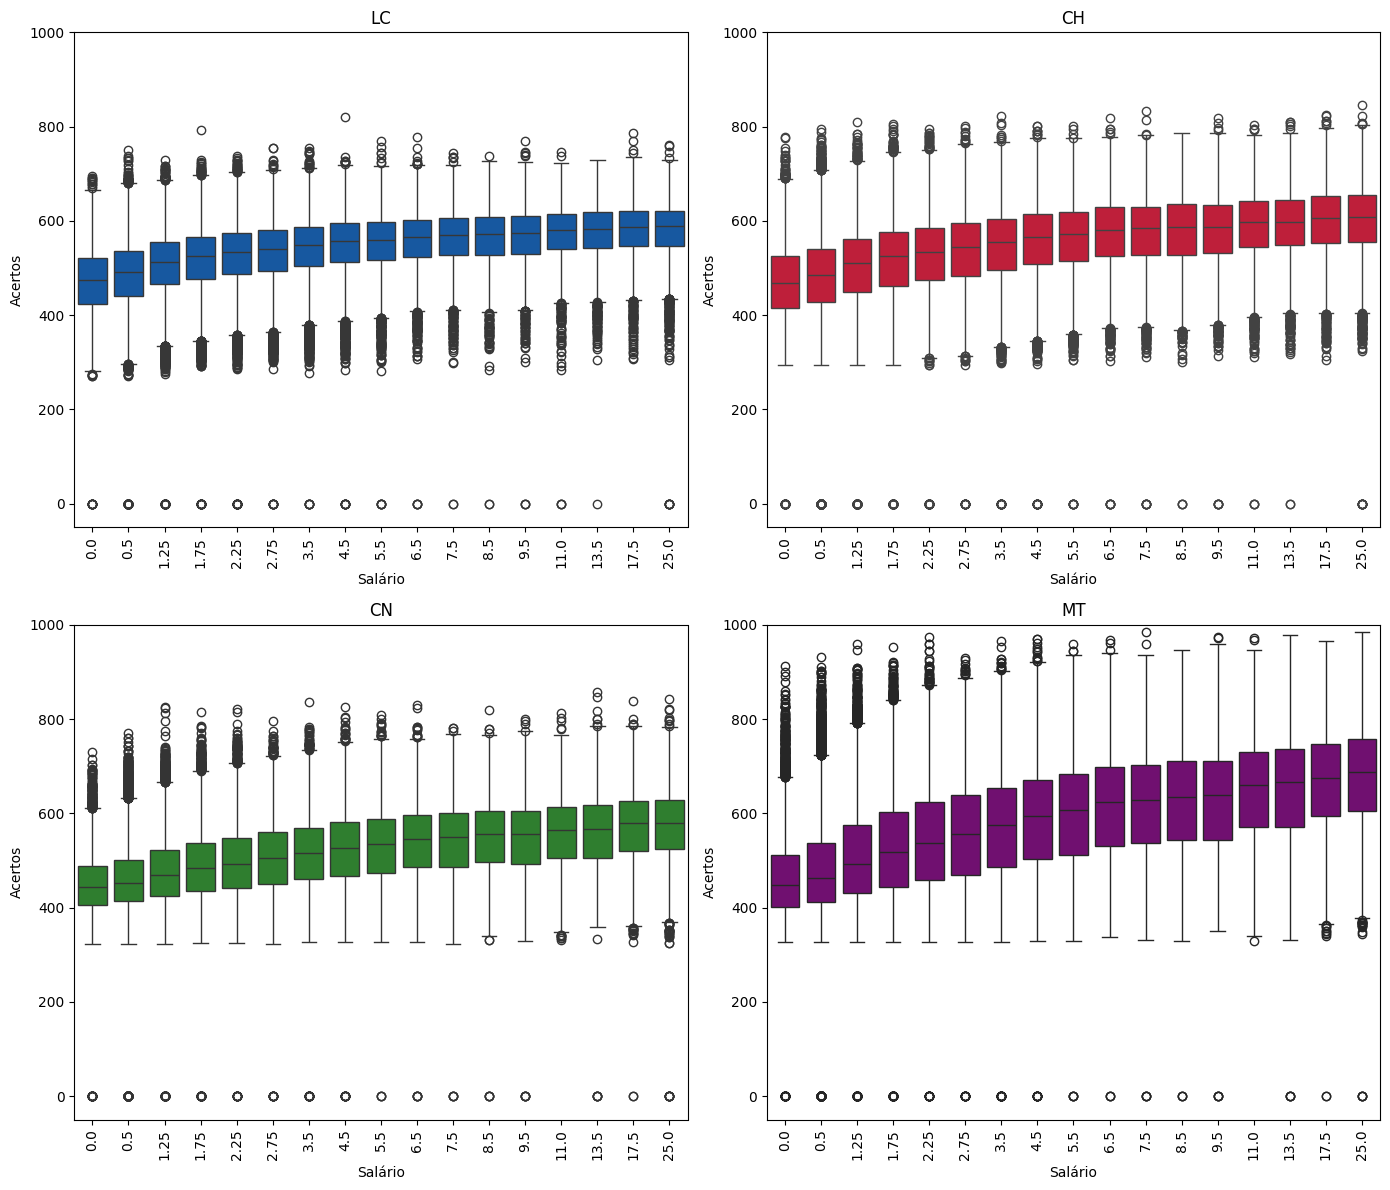

In [21]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com boxplots para cada coluna
plt.figure(figsize=(14, 12))  # Aumentando o tamanho horizontal

# Lista com os títulos para cada gráfico
titulos = ['LC', 'CH', 'CN', 'MT']
for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Gerando o gráfico de boxplot
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    sns.boxplot(data=df_acertos_filtrado, x='Q006', y=coluna, color=cores_materias[coluna])

    # Adicionando título e rótulos
    plt.title(titulos[i])
    plt.xlabel('Salário')
    plt.ylabel('Acertos')

    plt.ylim(-50, 1000)
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

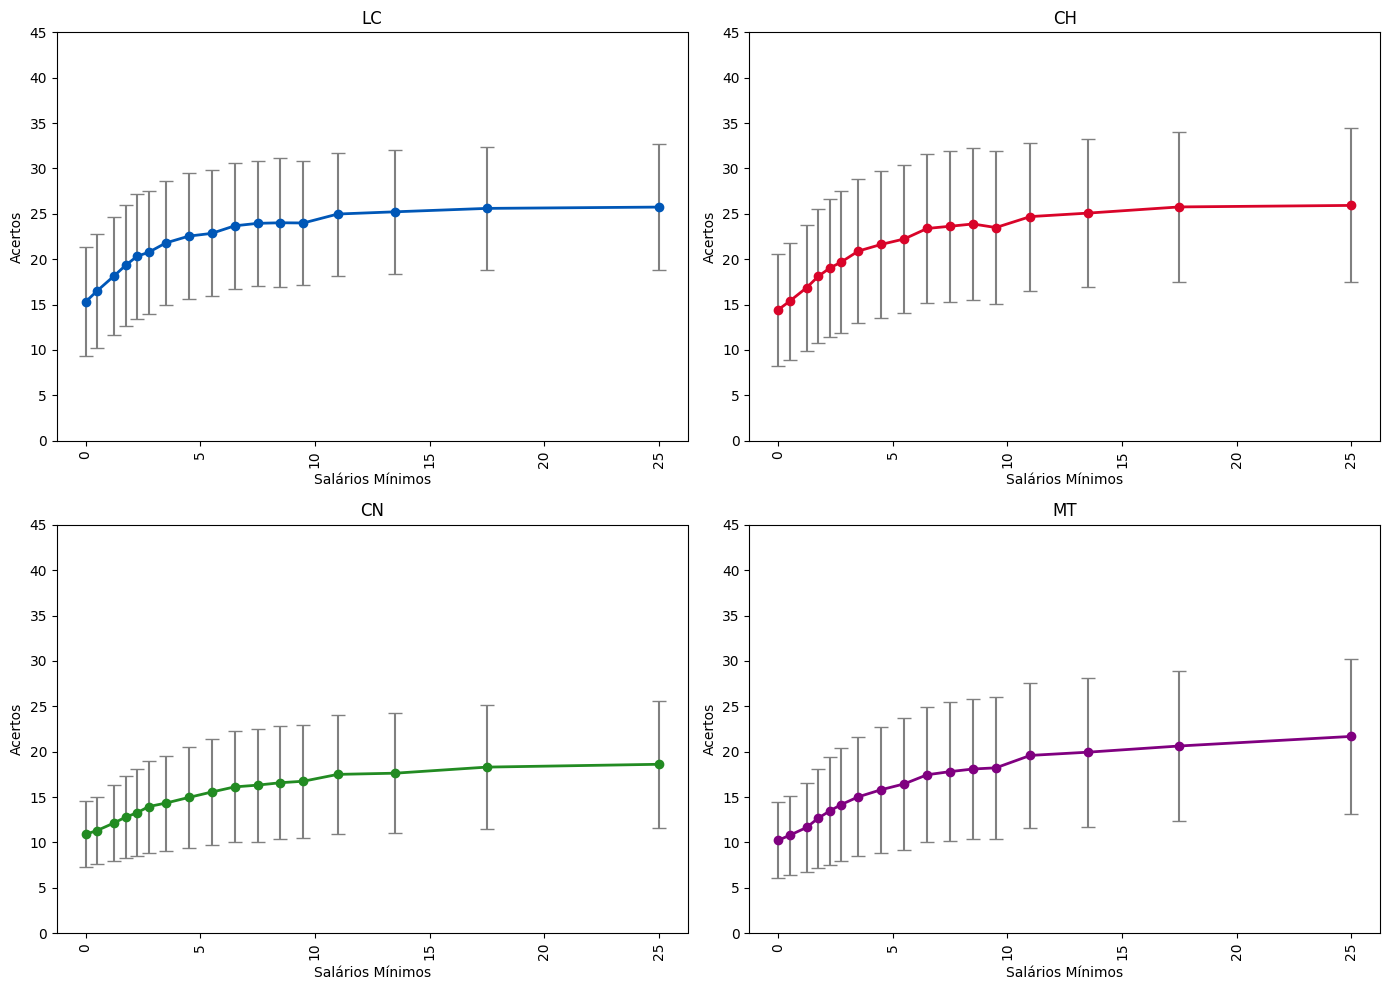

In [26]:
# Lista de colunas de interesse
colunas_pontos = ['acertos_lc', 'acertos_ch', 'acertos_cn', 'acertos_mt']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'acertos_lc': '#0057b7',   # Azul forte
    'acertos_ch': '#d90429',   # Vermelho forte
    'acertos_cn': '#228B22',   # Verde vegano
    'acertos_mt': '#800080'    # Roxo potente
}
# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

# Lista com os títulos para cada gráfico
titulos = ['LC', 'CH', 'CN', 'MT']
for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('Q006')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('Q006')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 45)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(titulos[i])
    plt.ylabel(f'Acertos')
    plt.xlabel('Salários Mínimos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

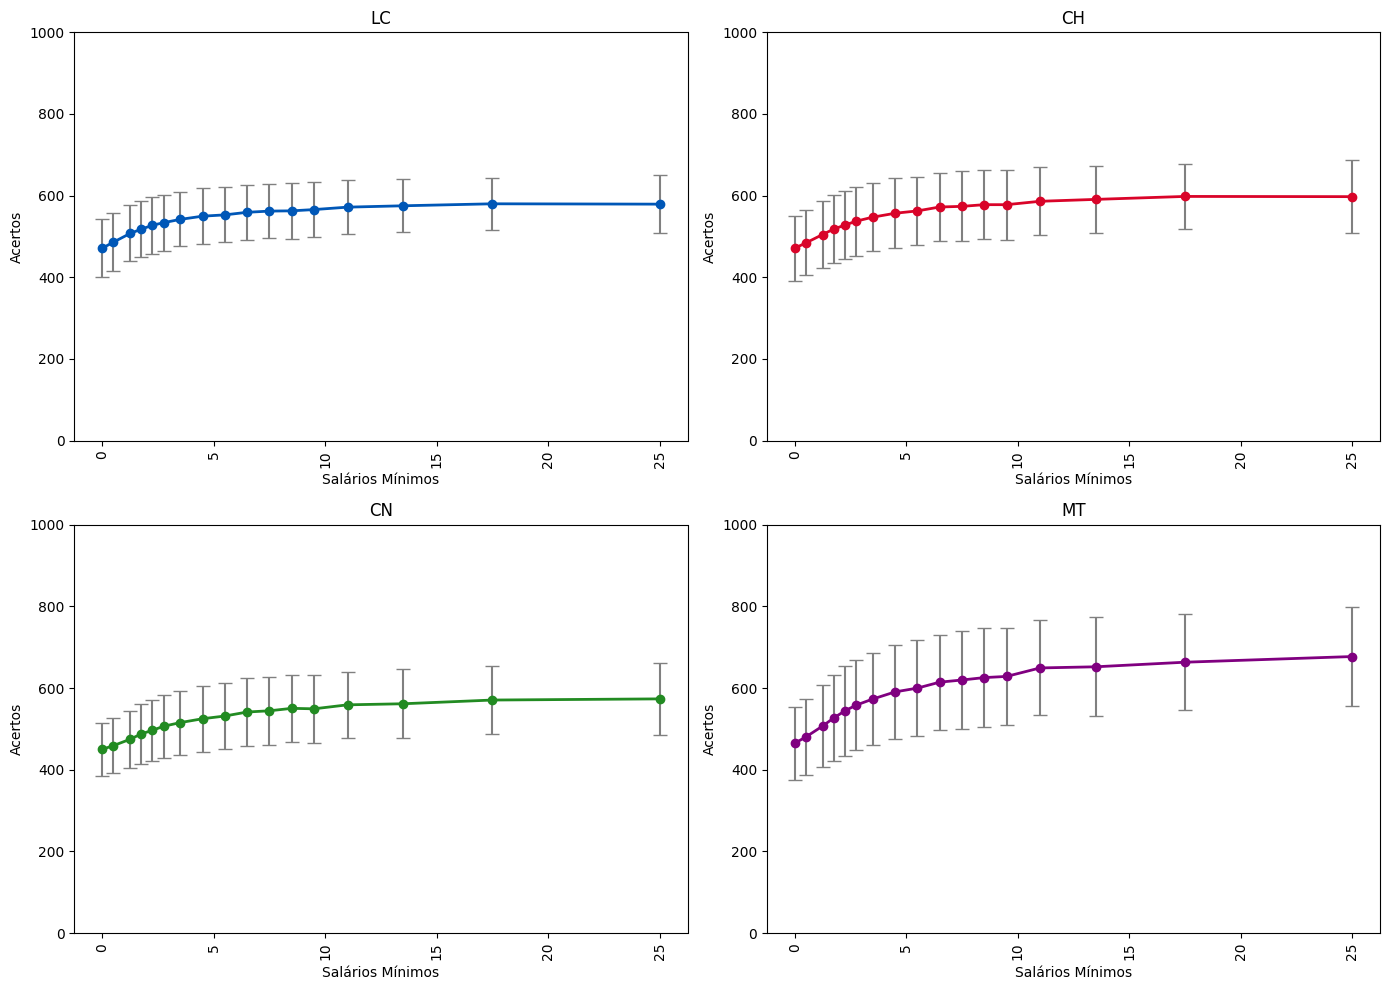

In [25]:
# Lista de colunas de interesse
colunas_pontos = ['TRI LC', 'TRI CH', 'TRI CN', 'TRI MT']

# Dicionário de cores para cada coluna de pontos
cores_materias = {
    'TRI LC': '#0057b7',   # Azul forte
    'TRI CH': '#d90429',   # Vermelho forte
    'TRI CN': '#228B22',   # Verde vegano
    'TRI MT': '#800080'    # Roxo potente
}

# Criando o gráfico com a média, barra de erro e linha conectando as médias
plt.figure(figsize=(14, 10))  # Aumentando o tamanho horizontal

# Lista com os títulos para cada gráfico
titulos = ['LC', 'CH', 'CN', 'MT']
for i, coluna in enumerate(colunas_pontos):
    # Filtrando os dados para remover as linhas com valores nulos na coluna específica
    df_acertos_filtrado = df_traduzido[df_traduzido[coluna].notnull()]

    # Calculando a média e o desvio padrão para cada faixa etária
    media = df_acertos_filtrado.groupby('Q006')[coluna].mean()
    desvpadrao = df_acertos_filtrado.groupby('Q006')[coluna].std()

    # Gerando o gráfico de linha com os pontos médios e barras de erro
    plt.subplot(2, 2, i+1)  # Subgráficos 2x2
    plt.errorbar(media.index, media, yerr=desvpadrao, fmt='o', color=cores_materias[coluna], ecolor='gray', capsize=5)

    # Conectando os pontos médios com uma linha
    plt.plot(media.index, media, color=cores_materias[coluna], linewidth=2)

    # Ajustando o eixo Y para ir de 0 a 45
    plt.ylim(0, 1000)

    # Ajustando o eixo X para mostrar apenas 0 e 1
    # plt.xticks([0, 1])  # Definindo os ticks como 0 e 1

    # Adicionando título e rótulos
    plt.title(titulos[i])
    plt.ylabel(f'Acertos')
    plt.xlabel('Salários Mínimos')
    # Rotacionando os rótulos do eixo X na vertical
    plt.xticks(rotation=90)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

## Analisando Concluintes de cada prova de cada ano

In [ ]:
df_traduzido

In [ ]:
df_2019 = df_traduzido[df_traduzido['NU_ANO'] == 2019]
df_2020 = df_traduzido[df_traduzido['NU_ANO'] == 2020]
df_2021 = df_traduzido[df_traduzido['NU_ANO'] == 2021]
df_2022 = df_traduzido[df_traduzido['NU_ANO'] == 2022]
df_2023 = df_traduzido[df_traduzido['NU_ANO'] == 2023]


### 2019

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2019.groupby('CO_PROVA_CH')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_ch = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_ch = agrupado['acertos_ch'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_ch = (contagem_concluintes_ch / contagem_acertos_ch) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_ch,
    'Contagem Concluintes': contagem_concluintes_ch,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_ch
})
tabela_resultado

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_ch))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_ch, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_ch, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_ch.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2019')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2019.groupby('CO_PROVA_CN')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_cn = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_cn = agrupado['acertos_cn'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_cn = (contagem_concluintes_cn / contagem_acertos_cn) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_cn,
    'Contagem Concluintes': contagem_concluintes_cn,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_cn
})
tabela_resultado

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_cn))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_cn, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_cn, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_cn.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2019')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### 2020

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2020.groupby('CO_PROVA_CH')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_ch = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_ch = agrupado['acertos_ch'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_ch = (contagem_concluintes_ch / contagem_acertos_ch) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_ch,
    'Contagem Concluintes': contagem_concluintes_ch,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_ch
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CH,,,
567.0,6940,6923,99.755043
568.0,7026,7014,99.829206
569.0,6959,6948,99.841931
570.0,7029,7018,99.843505


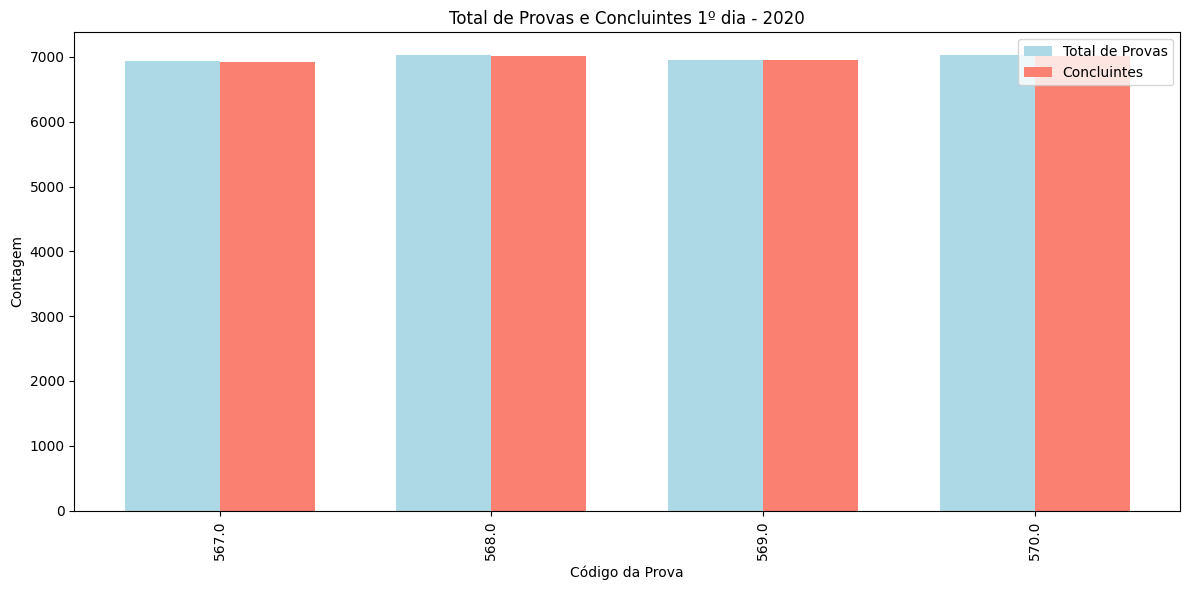

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_ch))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_ch, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_ch, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_ch.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2020')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2020.groupby('CO_PROVA_CN')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_cn = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_cn = agrupado['acertos_cn'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_cn = (contagem_concluintes_cn / contagem_acertos_cn) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_cn,
    'Contagem Concluintes': contagem_concluintes_cn,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_cn
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CN,,,
597.0,6554,6552,99.969484
598.0,6537,6533,99.938810
599.0,6593,6591,99.969665
600.0,6630,6627,99.954751


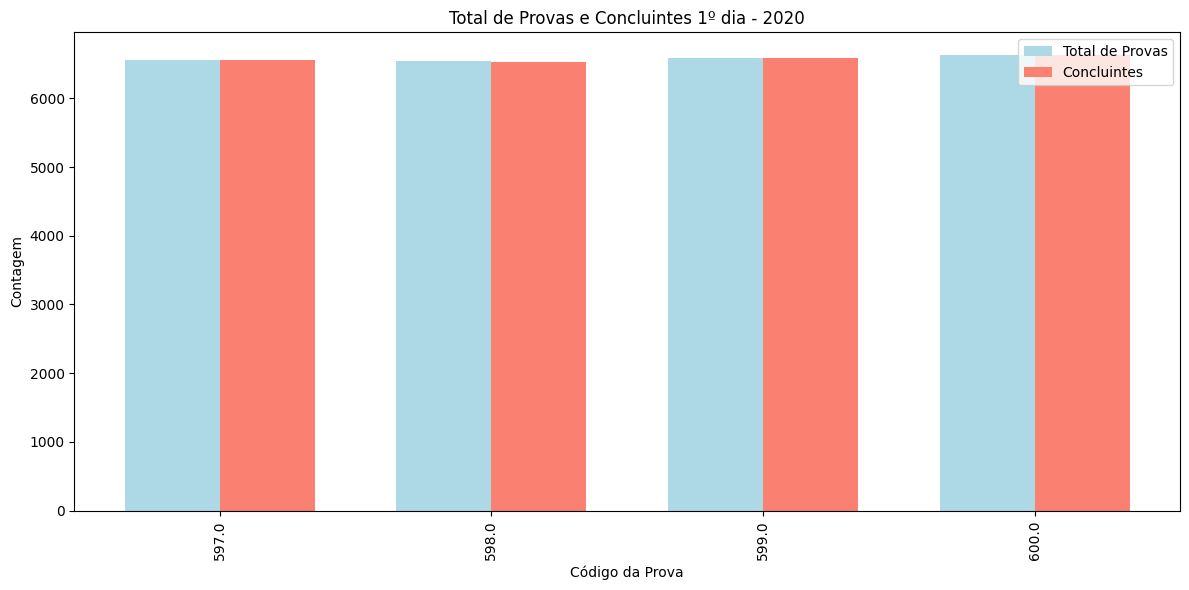

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_cn))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_cn, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_cn, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_cn.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2020')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### 2021

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2021.groupby('CO_PROVA_CH')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_ch = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_ch = agrupado['acertos_ch'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_ch = (contagem_concluintes_ch / contagem_acertos_ch) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_ch,
    'Contagem Concluintes': contagem_concluintes_ch,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_ch
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CH,,,
879.0,10012,9993,99.810228
880.0,10305,10280,99.757399
881.0,9885,9863,99.777441
882.0,9988,9969,99.809772


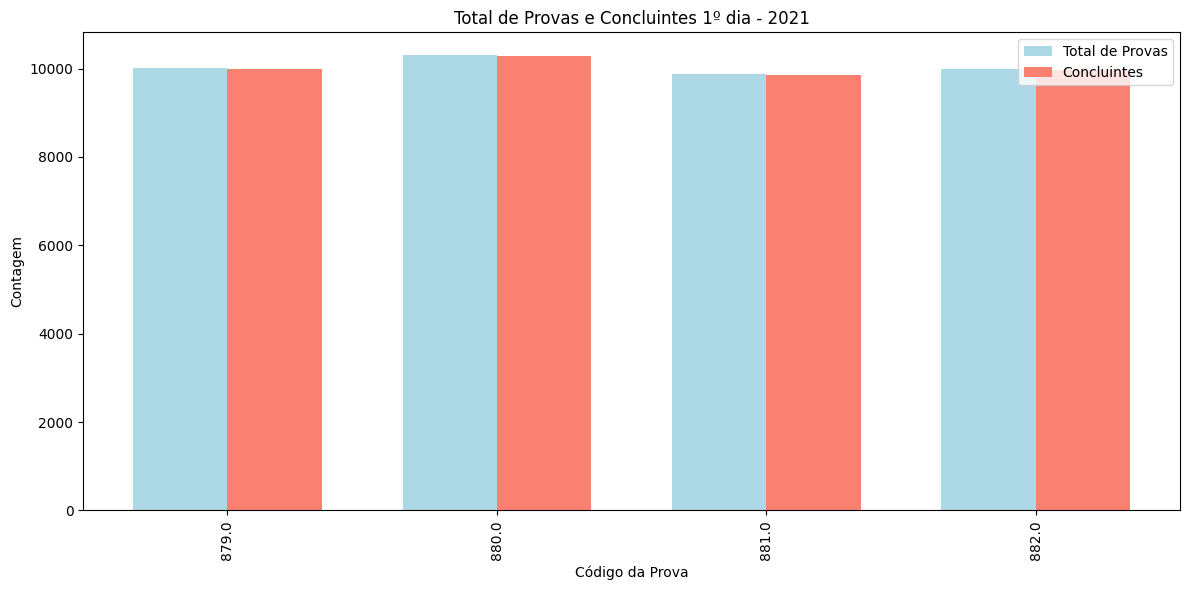

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_ch))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_ch, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_ch, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_ch.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2021')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2021.groupby('CO_PROVA_CN')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_cn = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_cn = agrupado['acertos_cn'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_cn = (contagem_concluintes_cn / contagem_acertos_cn) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_cn,
    'Contagem Concluintes': contagem_concluintes_cn,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_cn
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CN,,,
909.0,9349,9347,99.978607
910.0,9591,9591,100.000000
911.0,9676,9674,99.979330
912.0,9475,9471,99.957784


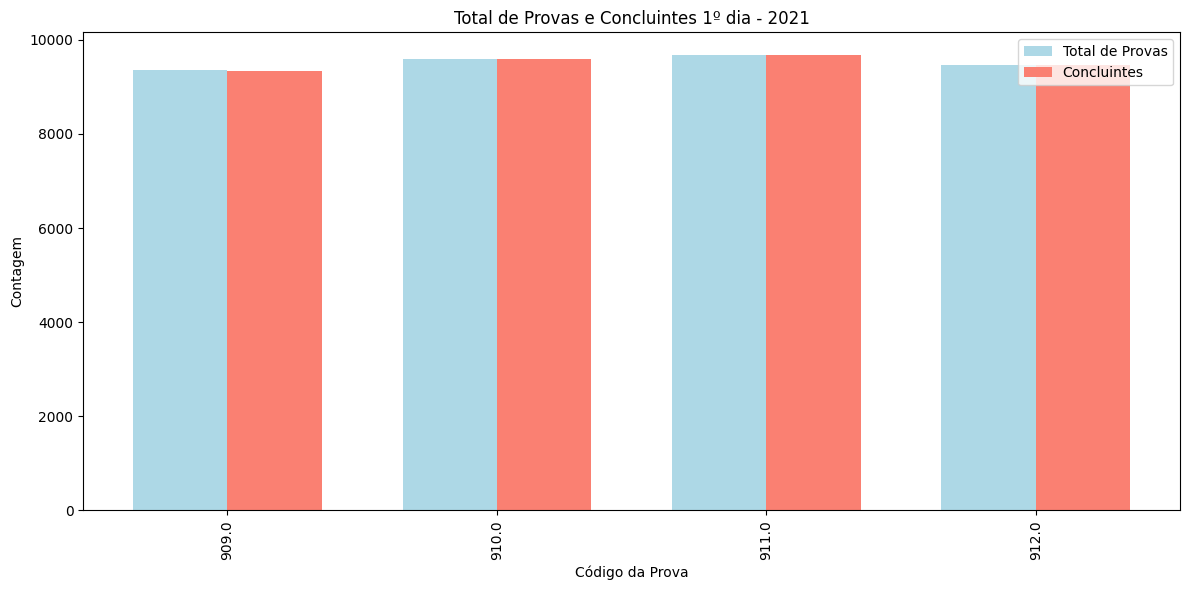

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_cn))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_cn, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_cn, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_cn.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2021')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### 2022

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2022.groupby('CO_PROVA_CH')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_ch = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_ch = agrupado['acertos_ch'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_ch = (contagem_concluintes_ch / contagem_acertos_ch) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_ch,
    'Contagem Concluintes': contagem_concluintes_ch,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_ch
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CH,,,
1055.0,10702,10680,99.794431
1056.0,10353,10331,99.787501
1057.0,10560,10532,99.734848
1058.0,10678,10656,99.793969


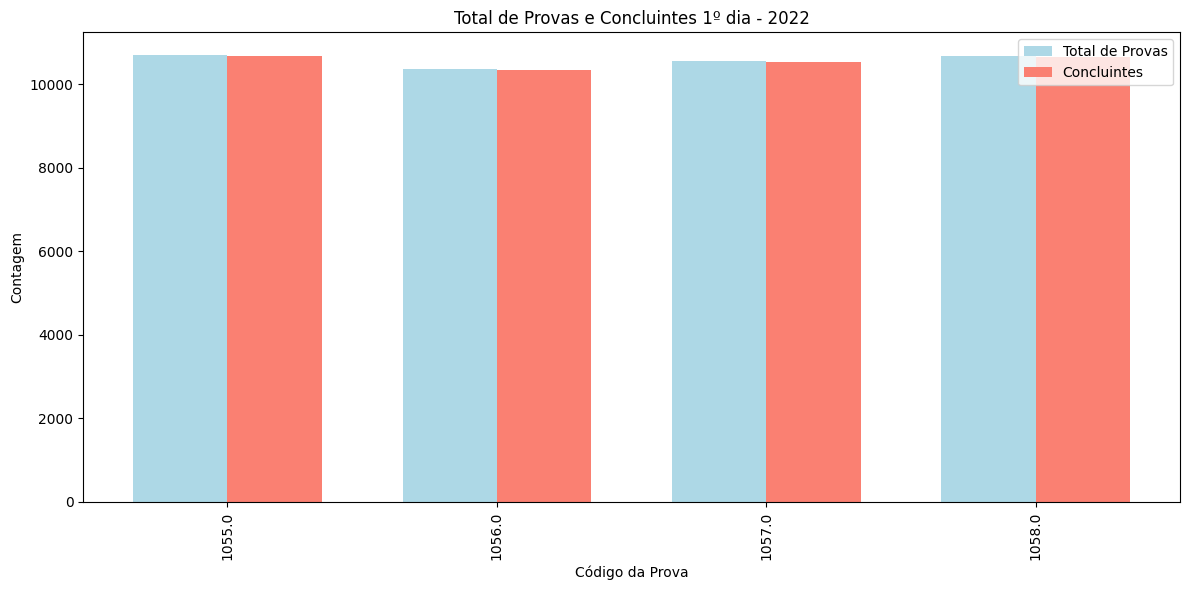

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_ch))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_ch, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_ch, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_ch.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2022')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2022.groupby('CO_PROVA_CN')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_cn = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_cn = agrupado['acertos_cn'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_cn = (contagem_concluintes_cn / contagem_acertos_cn) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_cn,
    'Contagem Concluintes': contagem_concluintes_cn,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_cn
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CN,,,
1085.0,9863,9860,99.969583
1086.0,10125,10123,99.980247
1087.0,9892,9886,99.939345
1088.0,10101,10099,99.980200


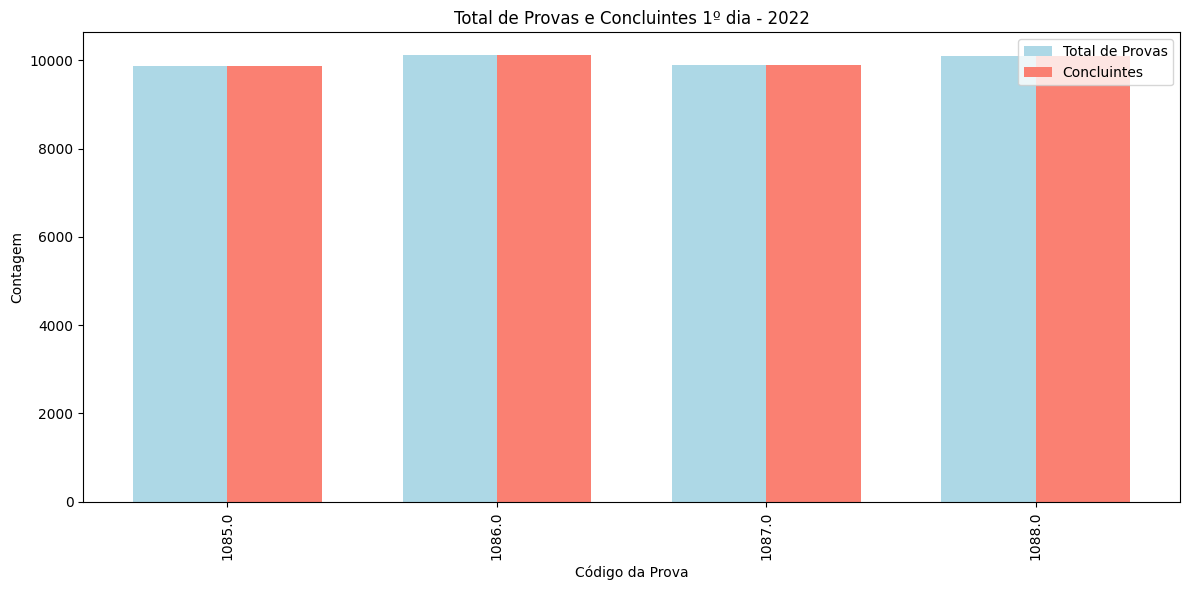

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_cn))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_cn, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_cn, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_cn.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2022')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### 2023

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2023.groupby('CO_PROVA_CH')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_ch = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_ch = agrupado['acertos_ch'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_ch = (contagem_concluintes_ch / contagem_acertos_ch) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_ch,
    'Contagem Concluintes': contagem_concluintes_ch,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_ch
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CH,,,
1191.0,10759,10733,99.758342
1192.0,10625,10600,99.764706
1193.0,10717,10691,99.757395
1194.0,10583,10565,99.829916


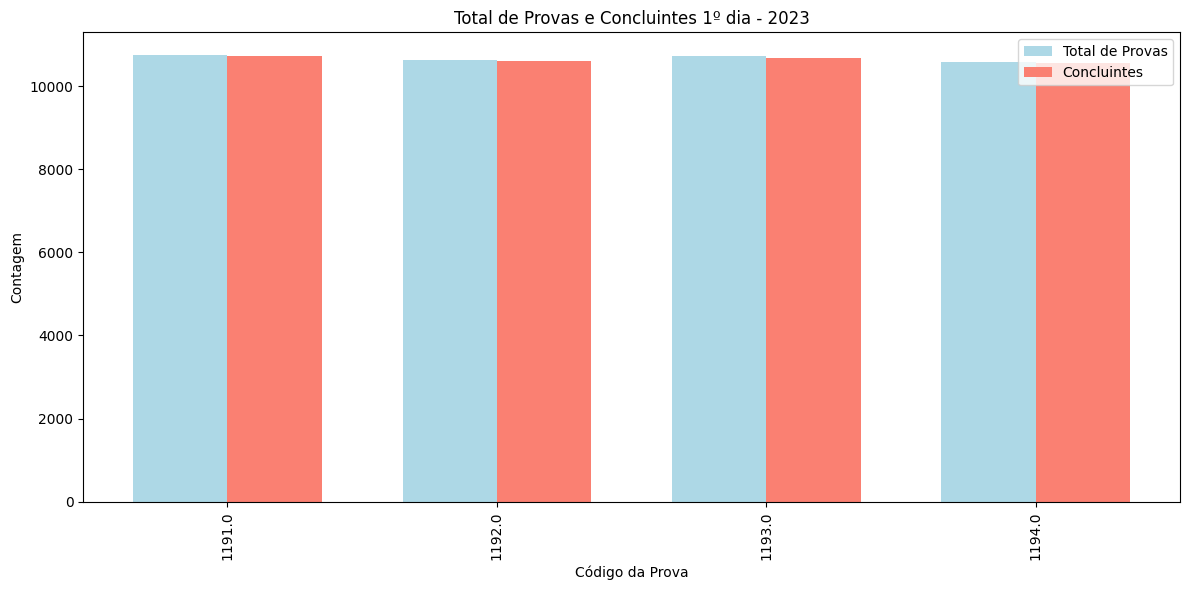

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_ch))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_ch, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_ch, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_ch.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2023')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupando por 'CO_PROVA_CH' 2019
agrupado = df_2023.groupby('CO_PROVA_CN')

# Agrupando por 'CO_PROVA_CH' e contando o número de linhas em cada grupo
contagem_acertos_cn = agrupado.size()

# Contando quantas linhas possuem 'acertos_ch' > 0 em cada grupo
contagem_concluintes_cn = agrupado['acertos_cn'].apply(lambda x: (x > 0).sum())
# Exibindo o resultado
# print(contagem_acertos_ch)
# print(contagem_concluintes_ch)
# Calculando a porcentagem de concluintes
porcentagem_concluintes_cn = (contagem_concluintes_cn / contagem_acertos_cn) * 100

# Criando o DataFrame com os valores
tabela_resultado = pd.DataFrame({
    'Contagem Acertos': contagem_acertos_cn,
    'Contagem Concluintes': contagem_concluintes_cn,
    'Porcentagem Concluintes (%)': porcentagem_concluintes_cn
})
tabela_resultado

,Contagem Acertos,Contagem Concluintes,Porcentagem Concluintes (%)
CO_PROVA_CN,,,
1221.0,10206,10144,99.392514
1222.0,10289,10208,99.212751
1223.0,10110,10046,99.366963
1224.0,10117,10069,99.525551


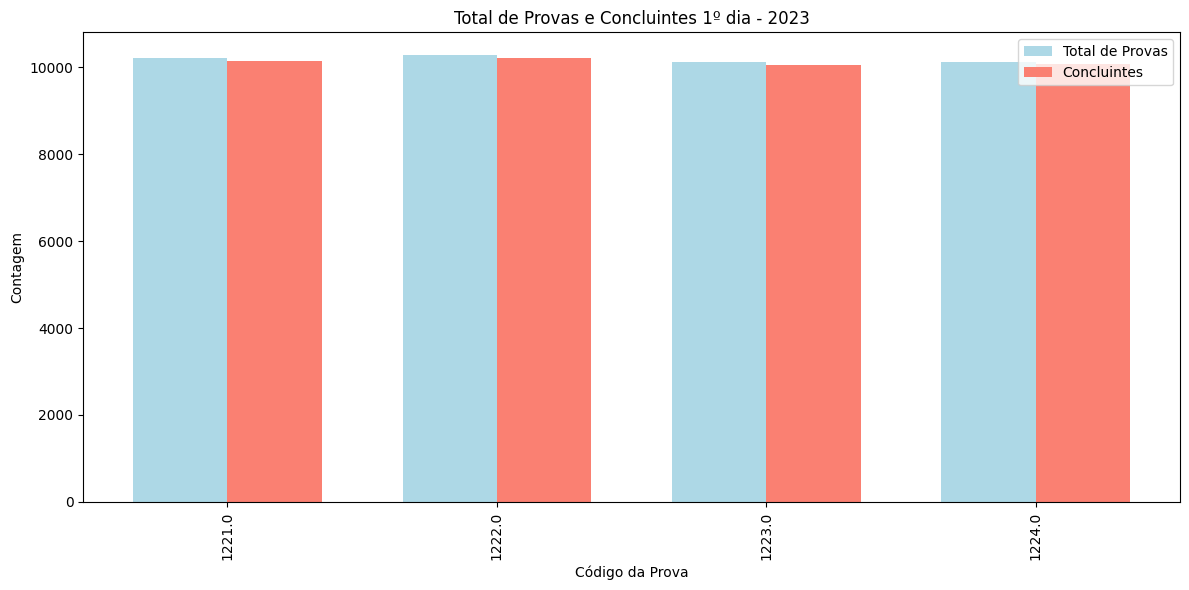

In [ ]:
# Criando o gráfico de barras com os valores de concluintes e total de valores para cada 'CO_PROVA_CH'
plt.figure(figsize=(12, 6))

# Definindo a largura das barras
largura = 0.35  # A largura das barras

# Ajustando as posições das barras no eixo X
posicoes = range(len(contagem_acertos_cn))

# Criando as barras para 'Contagem de Acertos' e 'Contagem de Concluintes'
plt.bar(posicoes, contagem_acertos_cn, width=largura, label='Total de Provas', color='lightblue')
plt.bar([p + largura for p in posicoes], contagem_concluintes_cn, width=largura, label='Concluintes', color='salmon')

# Ajustando o eixo X para mostrar os valores de 'CO_PROVA_CH'
plt.xticks([p + largura / 2 for p in posicoes], contagem_acertos_cn.index, rotation=90)

# Adicionando título e rótulos
plt.title('Total de Provas e Concluintes 1º dia - 2023')
plt.xlabel('Código da Prova')
plt.ylabel('Contagem')

# Adicionando a legenda
plt.legend()

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()